# Proyek Akhir: Menyelesaikan Permasalahan departemen Human Resources (HR)

Nama: Seprianto Sianipar
Email: raysianipar15@gmail.com
Id Dicoding: seprianto15


## Persiapan

### Menyiapkan library yang dibutuhkan

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
import joblib

### Menyiapkan data yang akan diguankan

In [34]:
# Load dataset

URL = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv'
employee_df = pd.read_csv(URL)
employee_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [35]:
# Tinjau jumlah baris, kolom dan jenis data

employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [36]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

employee_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [37]:
# Tinjau jumlah missing value

missing_values = employee_df.isnull().sum()
missing_values[missing_values > 0]

Attrition    412
dtype: int64

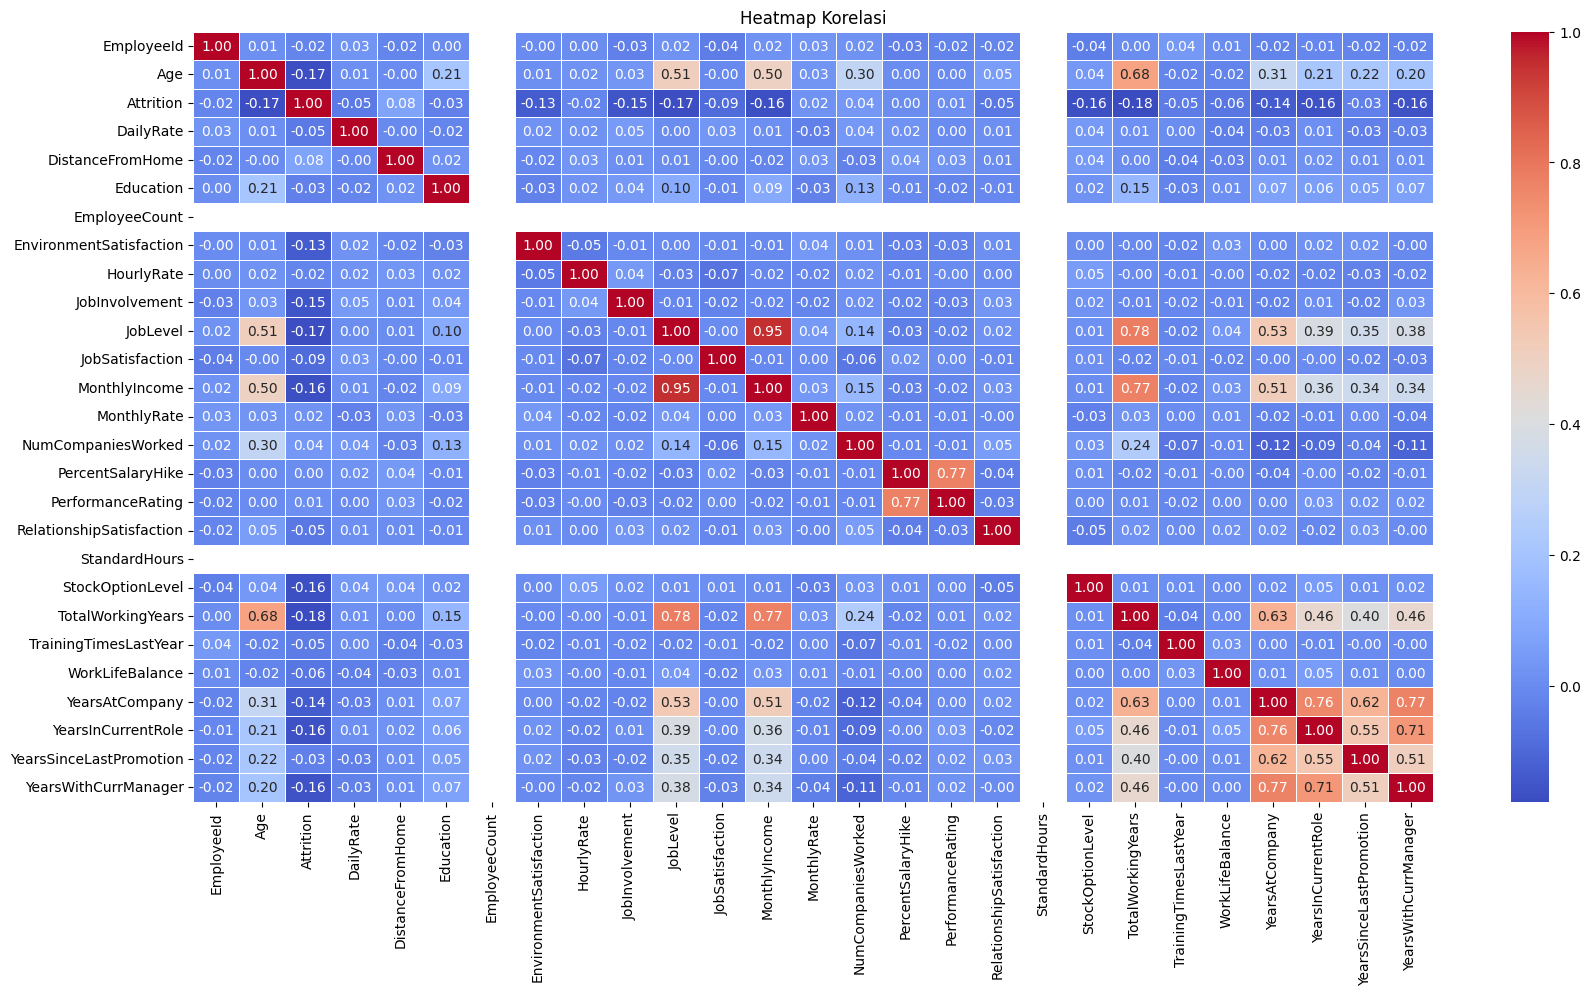

In [38]:
# Menampilkan korelasi antar fitur numerik

# Memilih kolom numerik
numeric_features = employee_df.select_dtypes(include=['number']).columns

### MULAI CODE ###

# Hitung matriks korelasi fitur numerik

plt.figure(figsize=(20, 10))
correlation_matrix = employee_df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

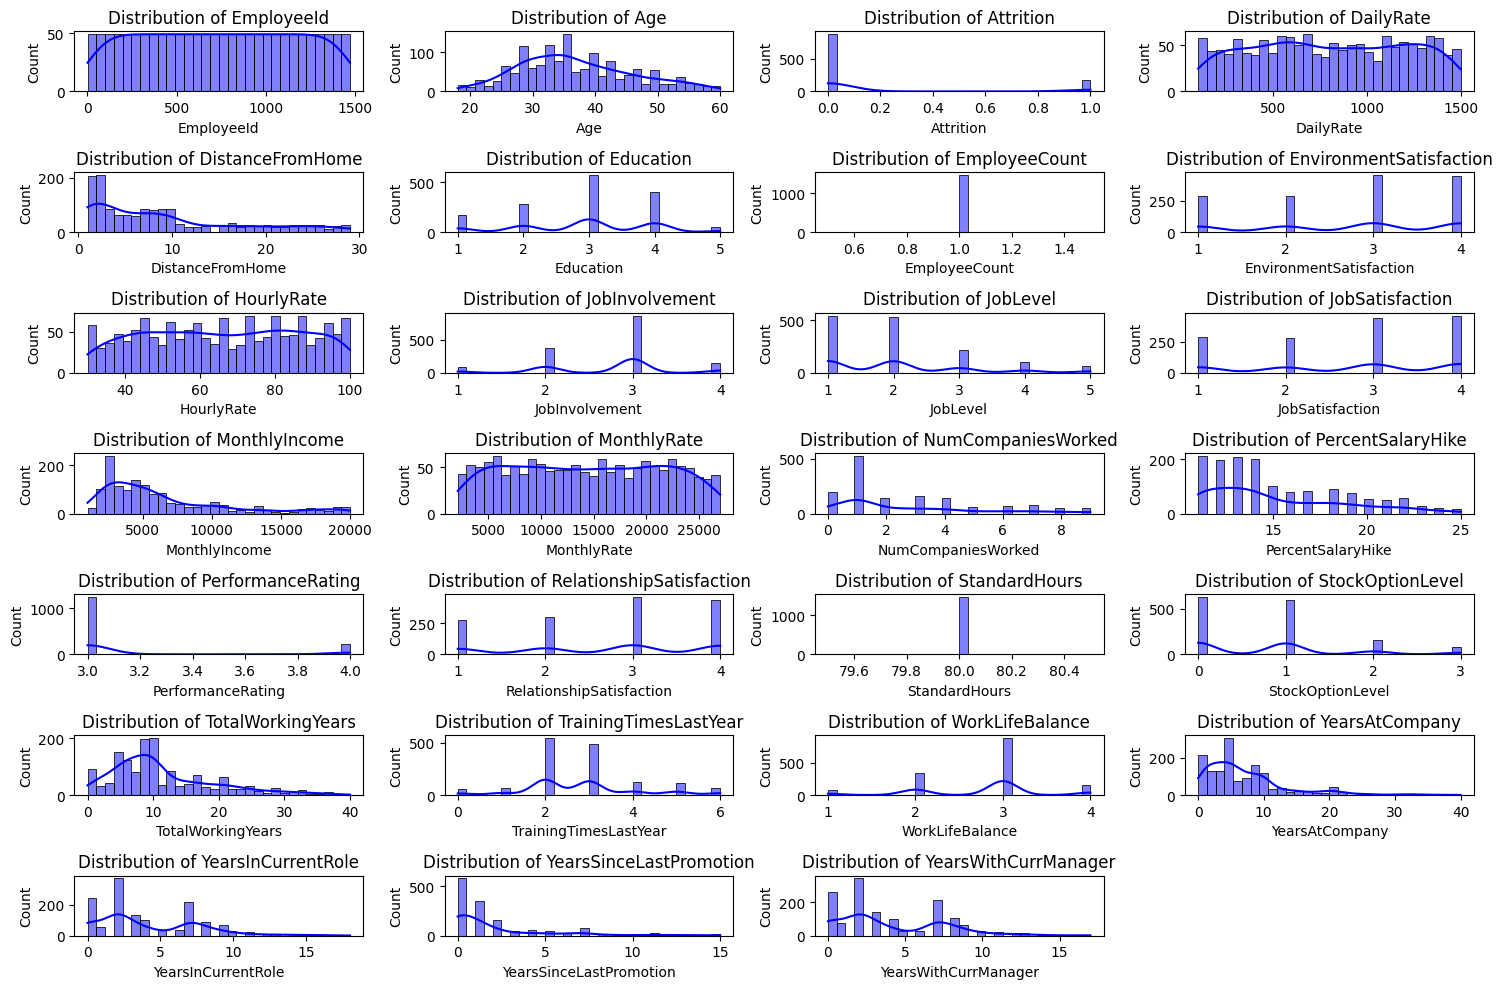

In [39]:
# Distribusi fitur numerik
n_feature = len(numeric_features)
n_cols = 4
n_row = (n_feature + n_cols - 1) // n_cols

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_row, n_cols, i)
    sns.histplot(employee_df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

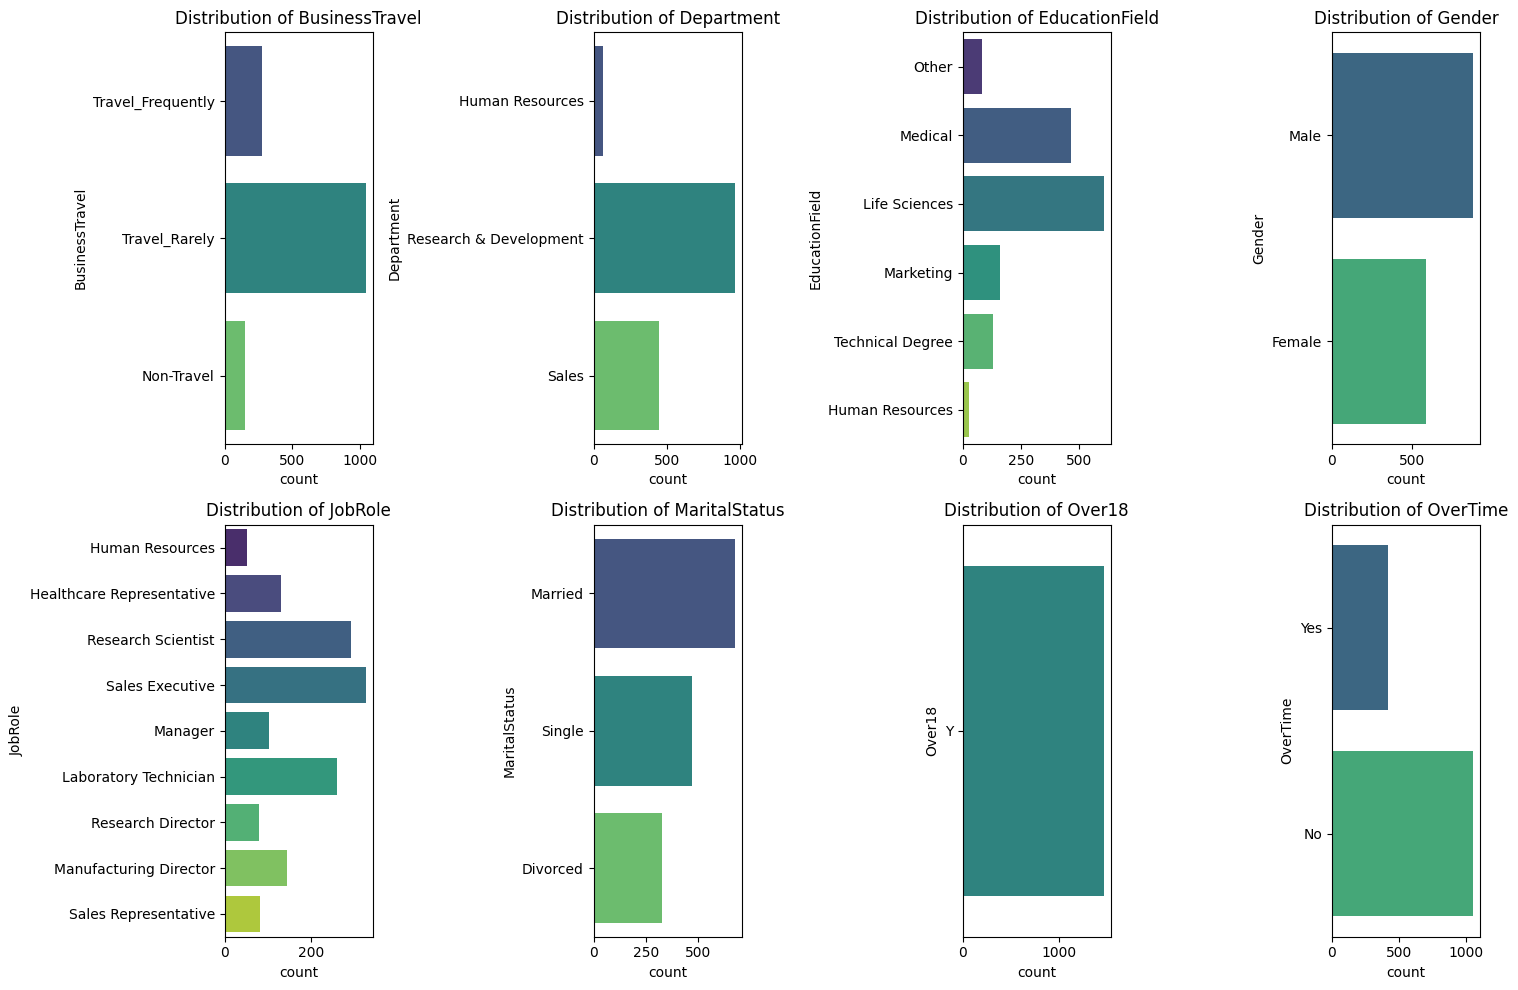

In [40]:
# Distribusi fitur kategorikal
categorical_features = employee_df.select_dtypes(include=['object']).columns

n_feature_cat = len(categorical_features)
n_cols_cat = 4
n_row_cat = (n_feature_cat + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_row_cat, n_cols_cat, i)
    sns.countplot(y=employee_df[feature], 
                  hue=employee_df[feature], 
                  palette='viridis', 
                  legend=False)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

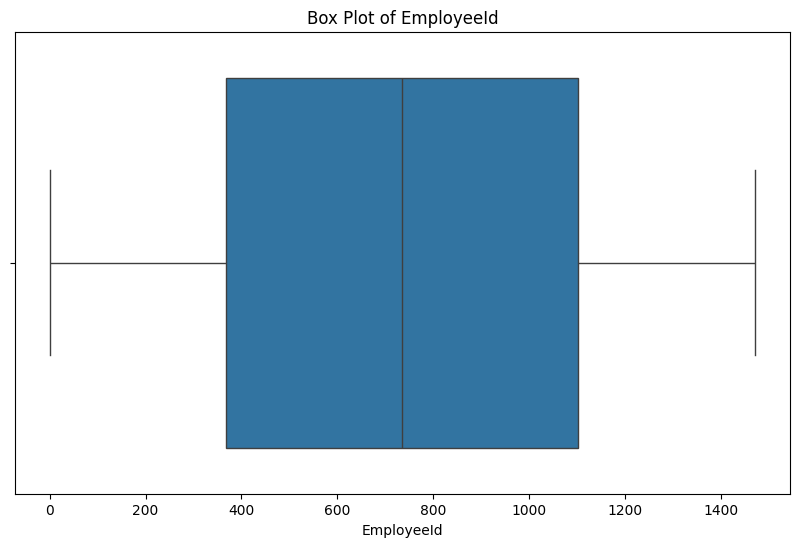

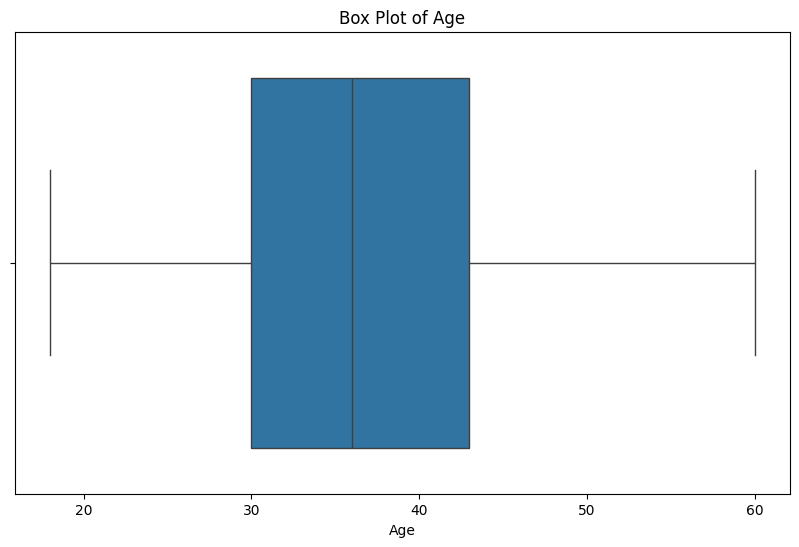

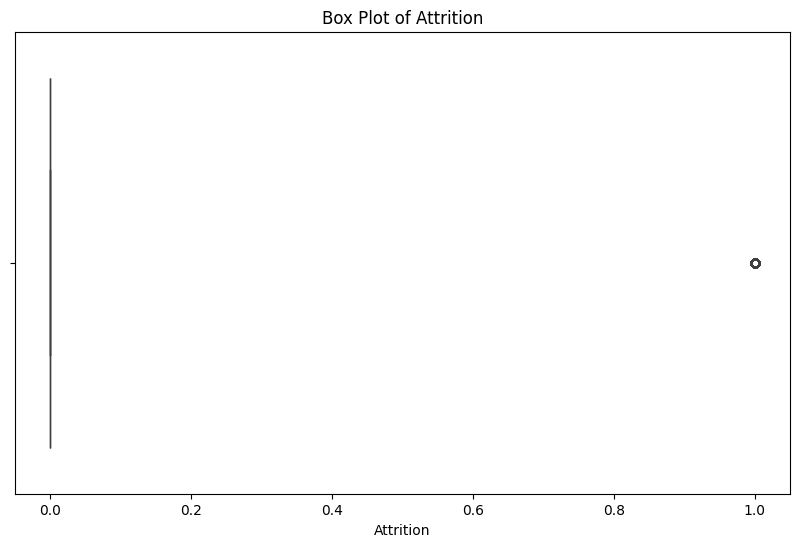

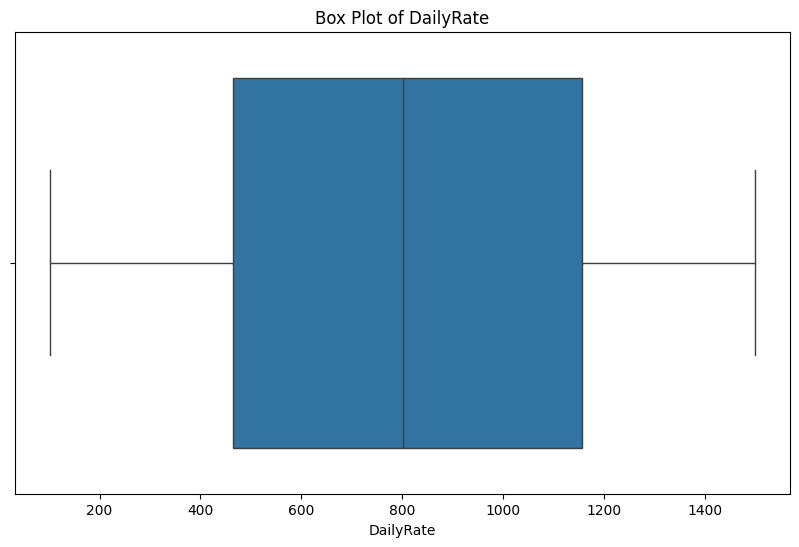

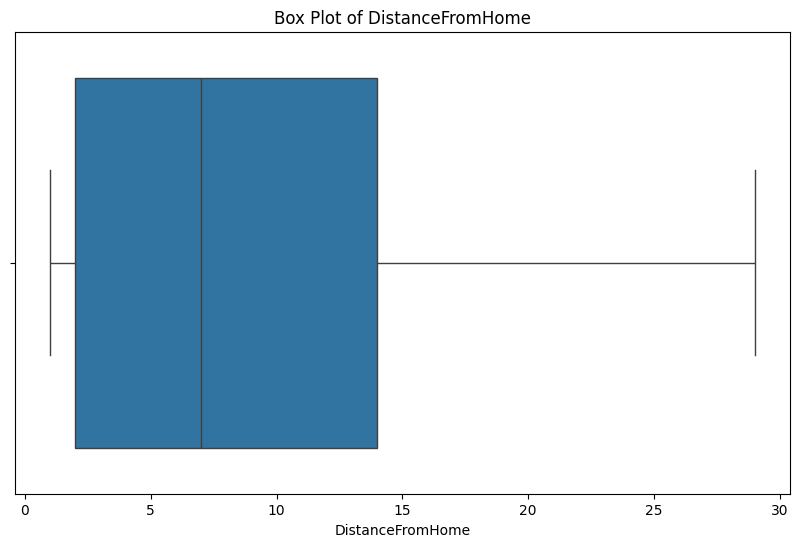

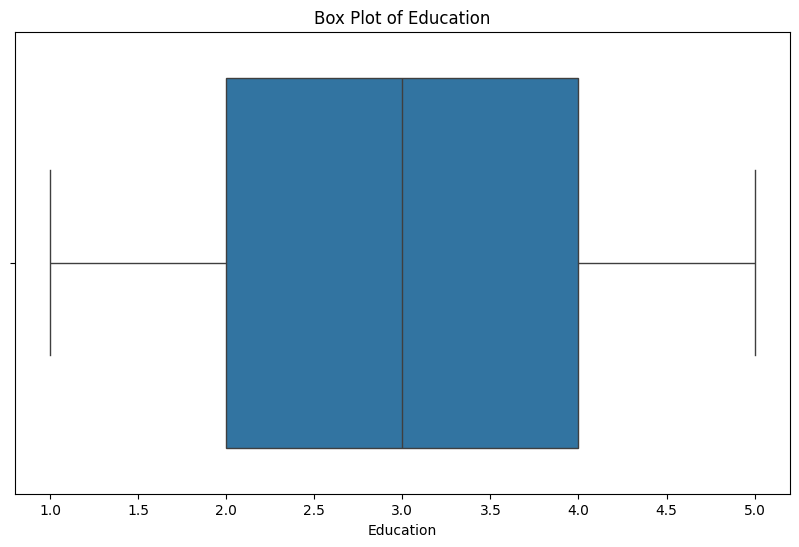

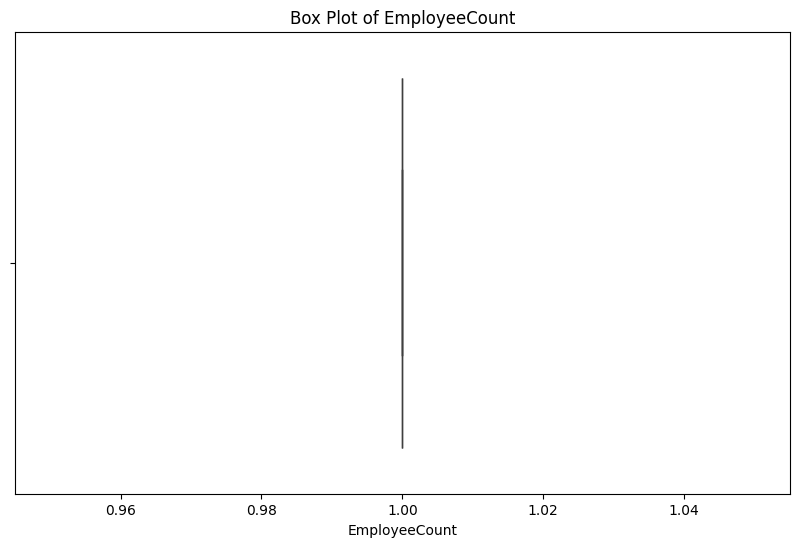

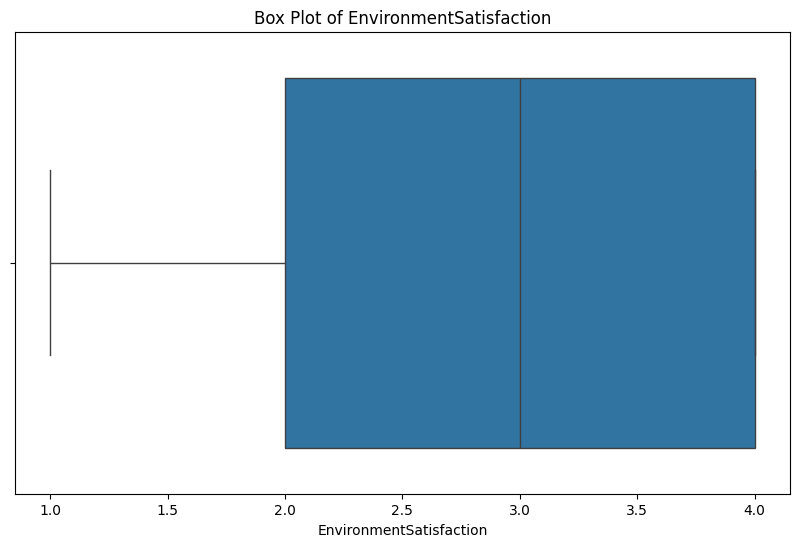

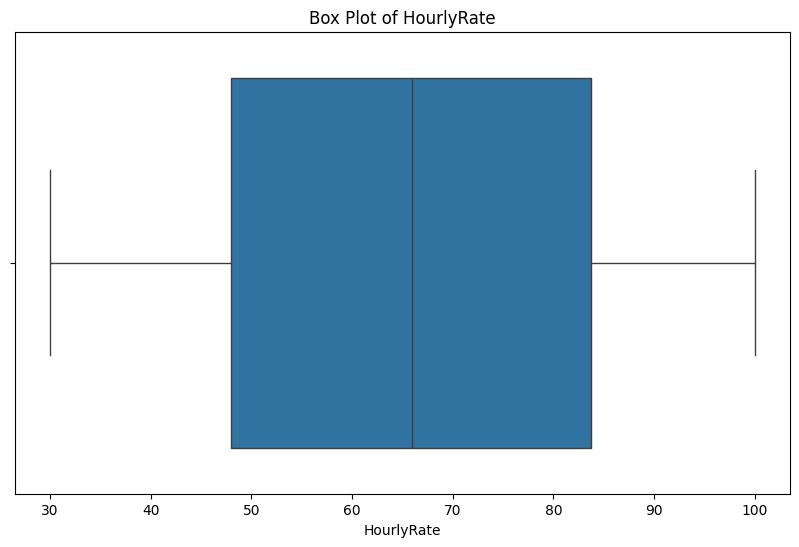

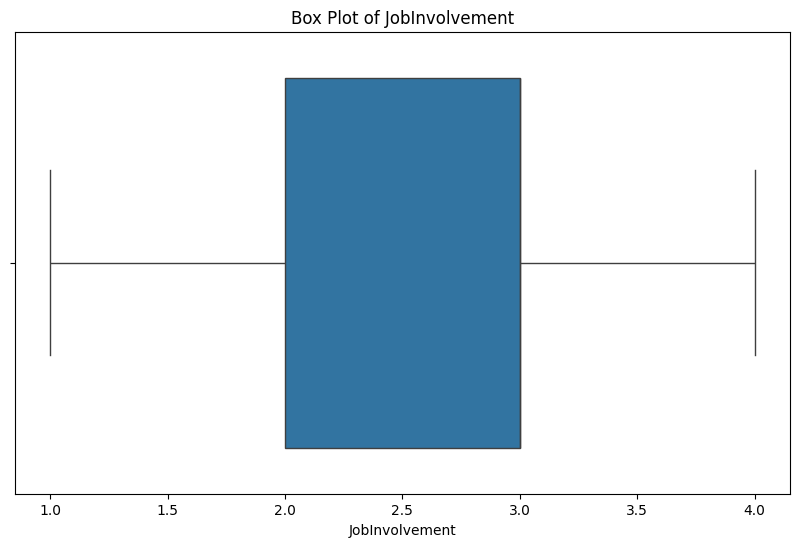

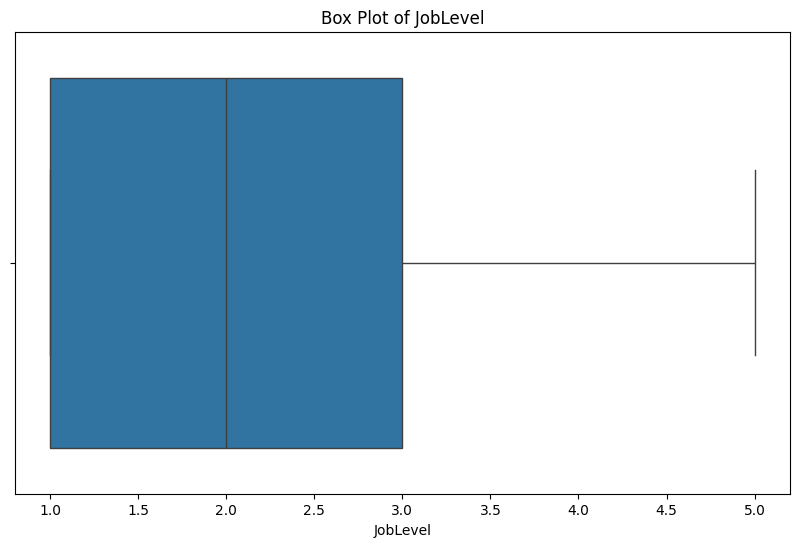

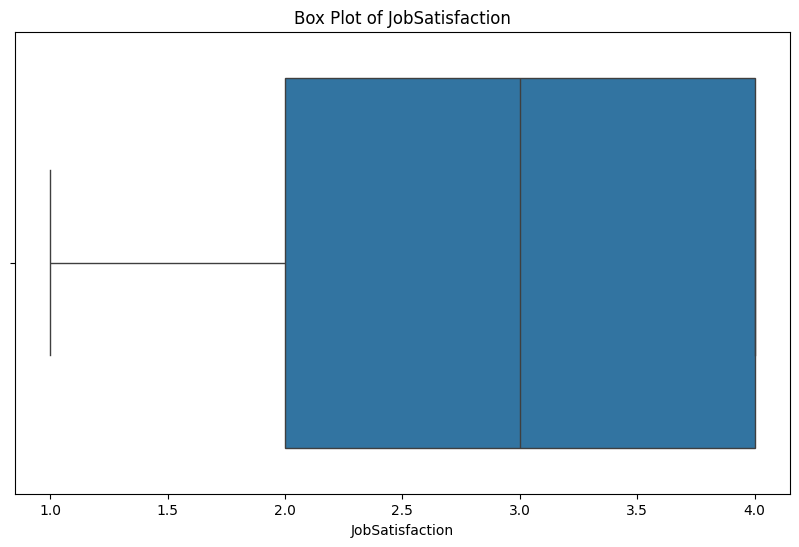

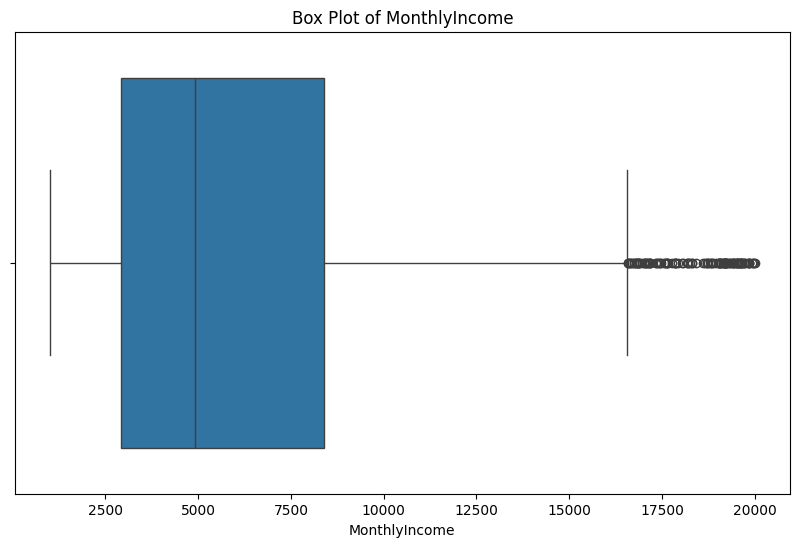

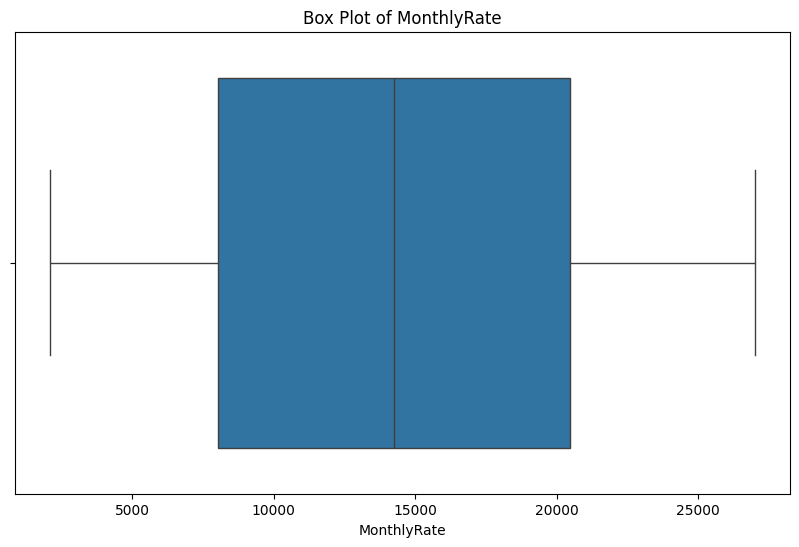

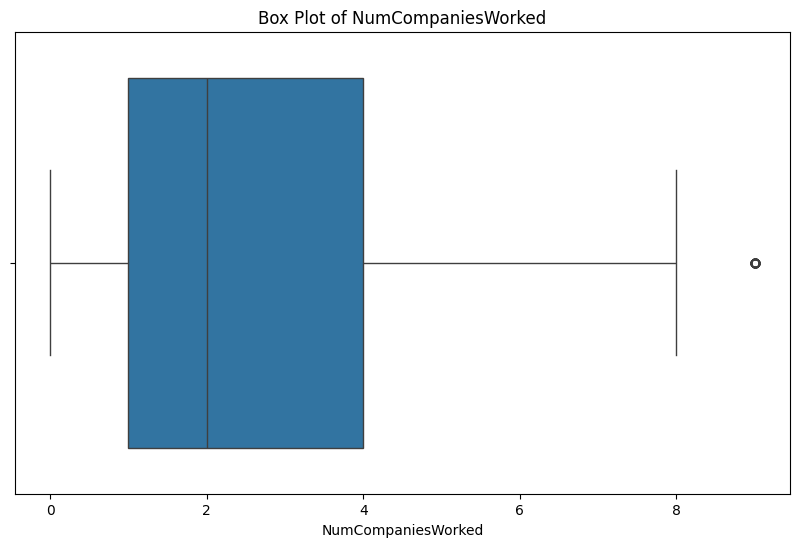

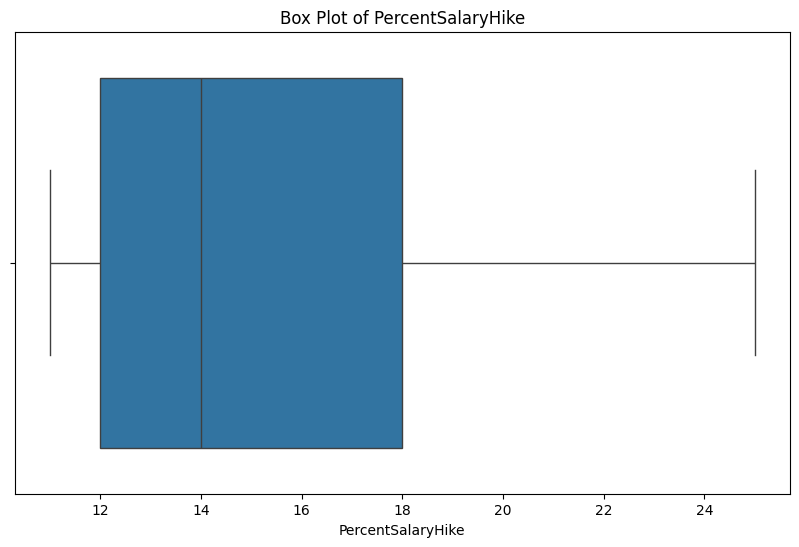

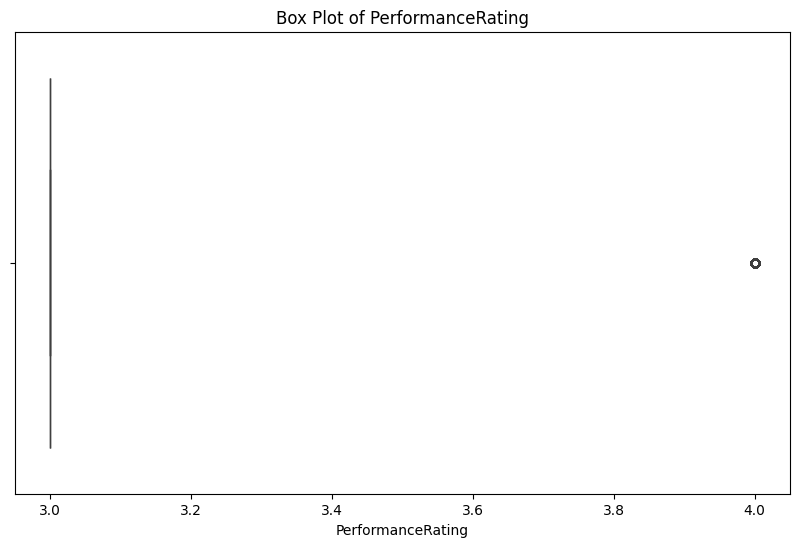

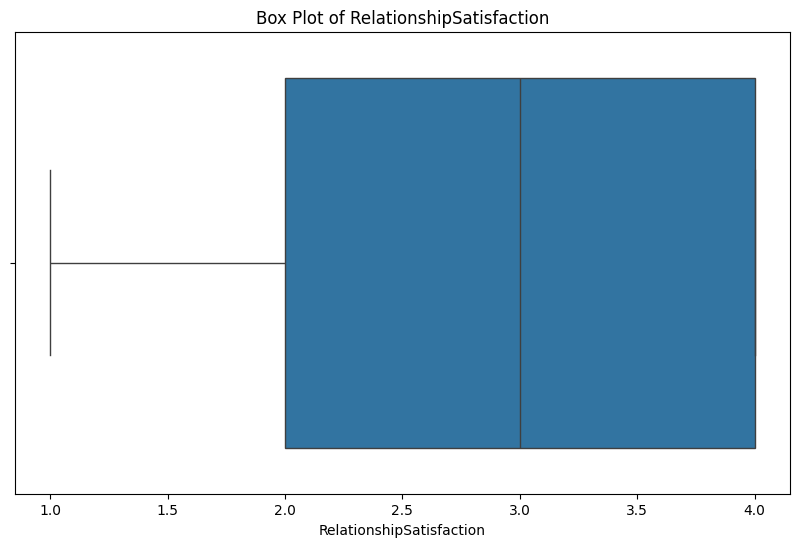

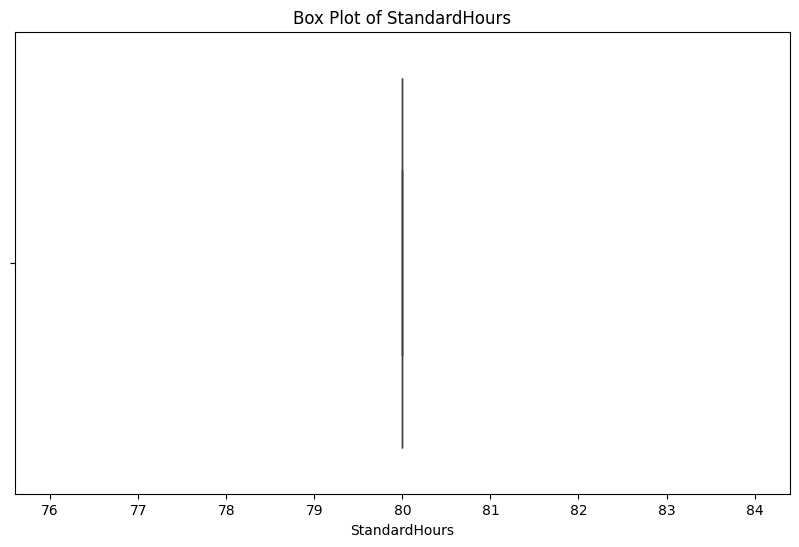

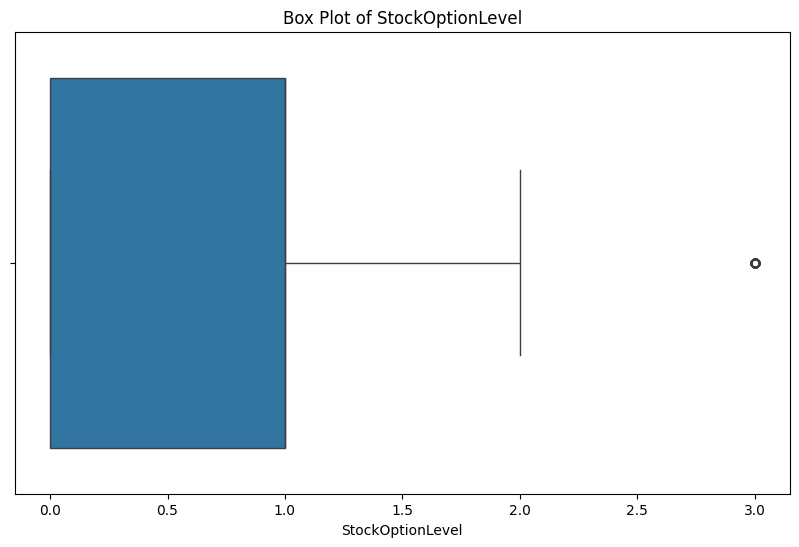

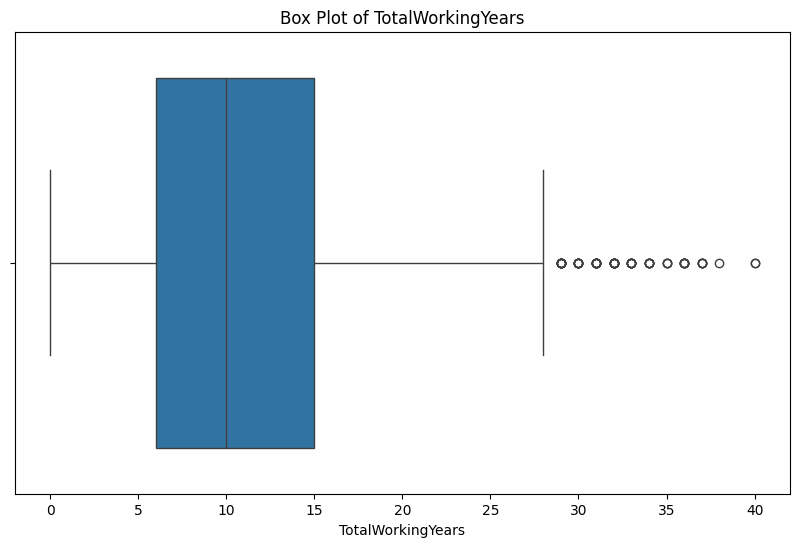

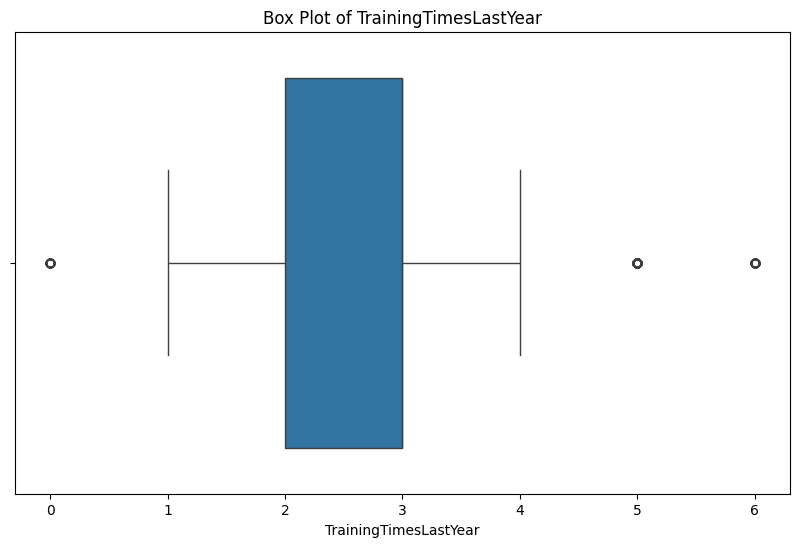

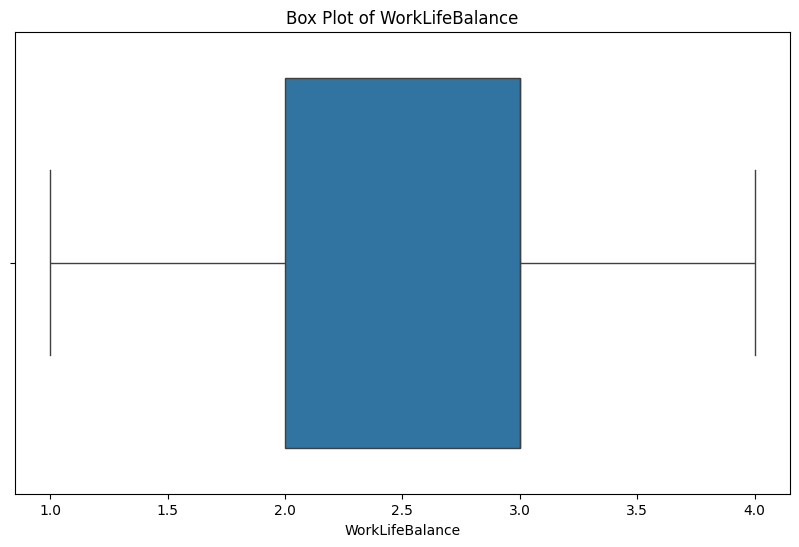

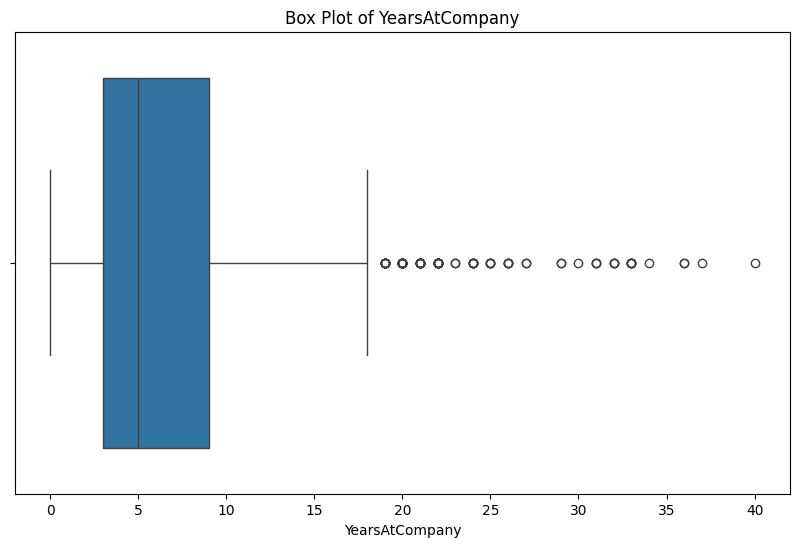

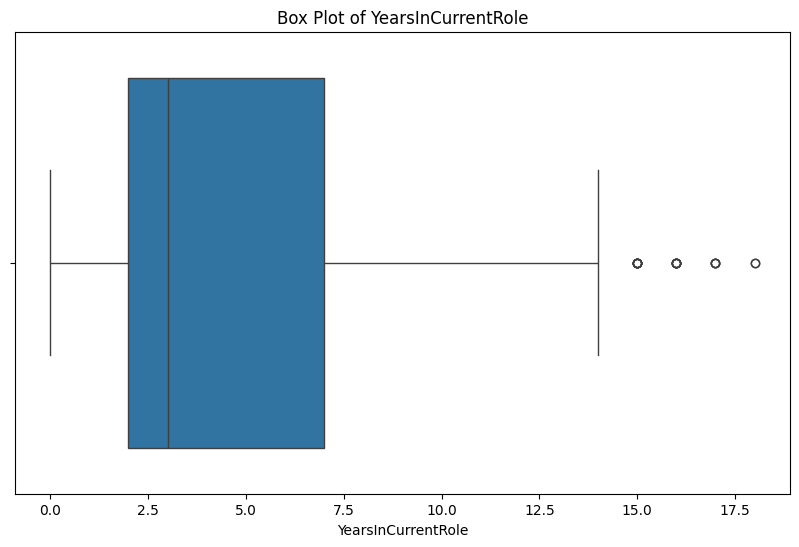

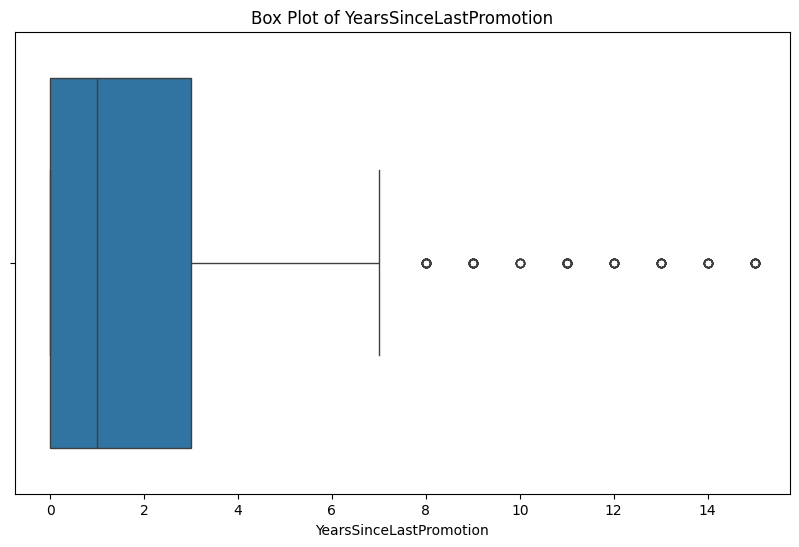

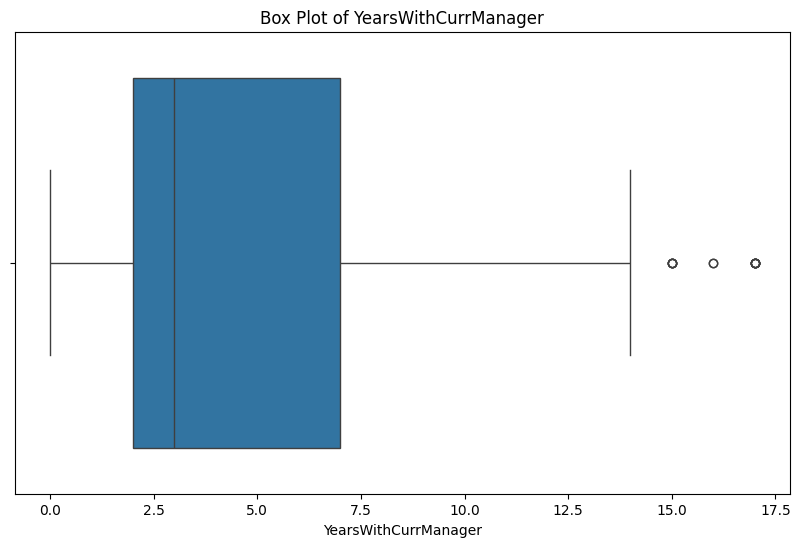

In [41]:
# Identifikasi outlier fitur numerik menggunakan box plot
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=employee_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [42]:
# Tinjau duplikasi data

print('Jumlah duplikasi:', employee_df.duplicated().sum())

Jumlah duplikasi: 0


## Data Preparation / Preprocessing

In [43]:
# Mengisi missing value dengan nilai minimum untuk kolom numerik
employee_df[numeric_features] = employee_df[numeric_features].fillna(employee_df[numeric_features].min())

# Tinjau kembali jumlah missing value after cleaning
missing_values = employee_df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [44]:
# Menghapus kolom EmployeeCount, StandardHours dan Over18 karena memiliki nilai yang konstan
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

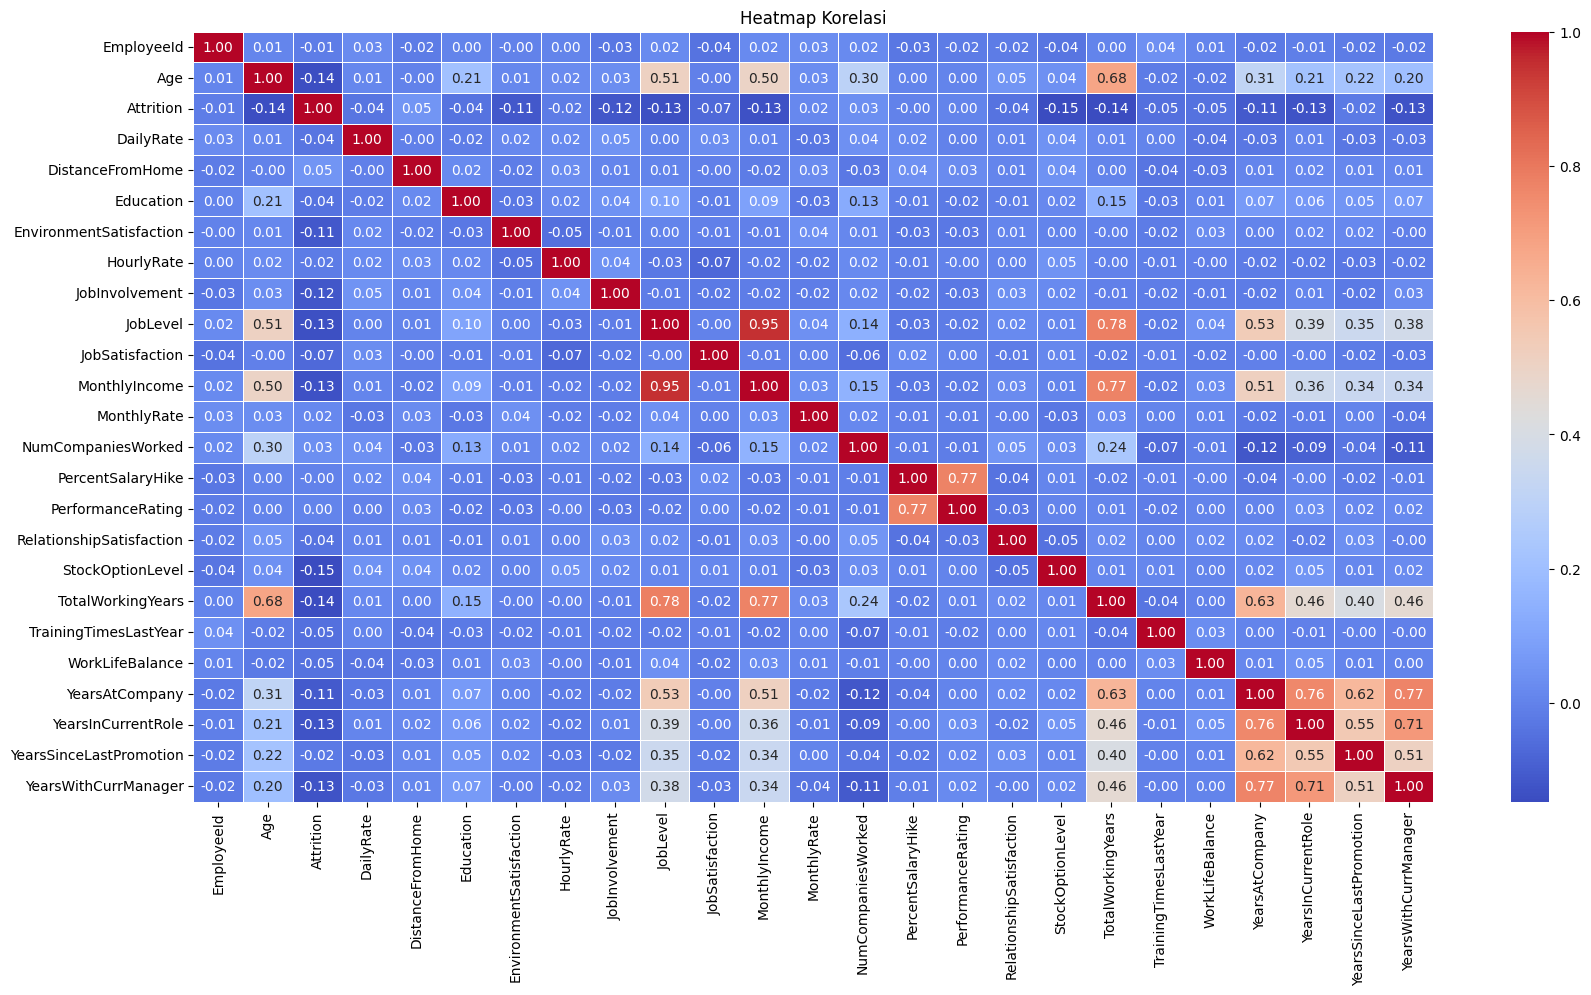

In [45]:
# Tinjau ulang korelasi antar fitur numerik

# Memilih kolom numerik
numeric_features = employee_df.select_dtypes(include=['number']).columns

### MULAI CODE ###

# Hitung matriks korelasi fitur numerik

plt.figure(figsize=(20, 10))
correlation_matrix = employee_df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

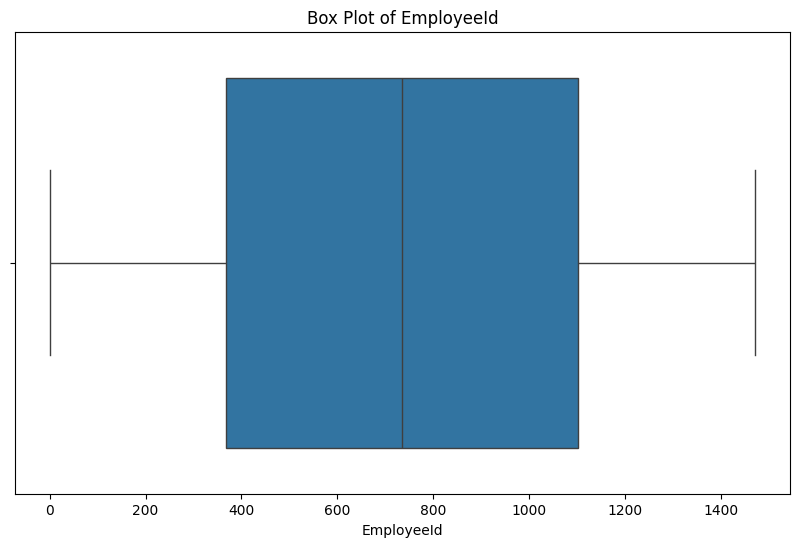

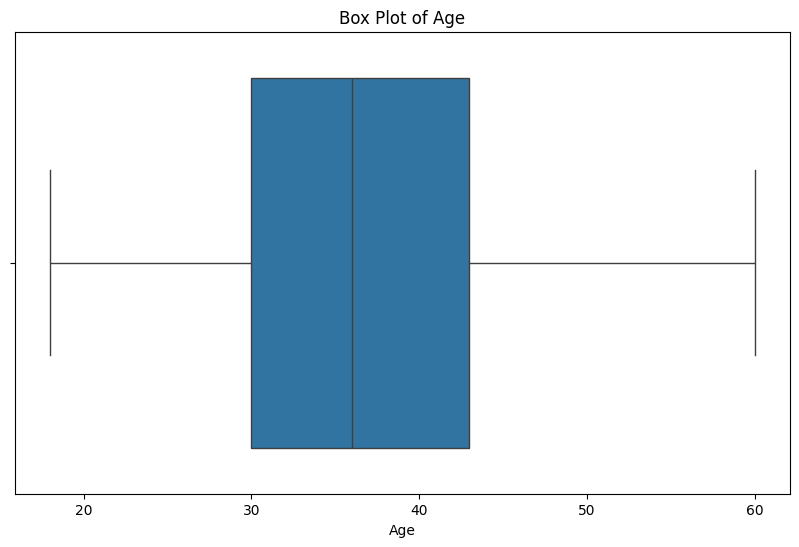

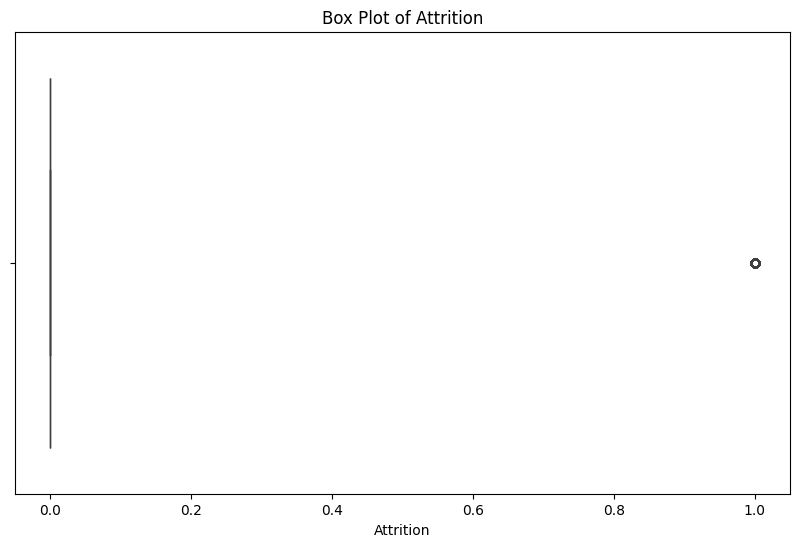

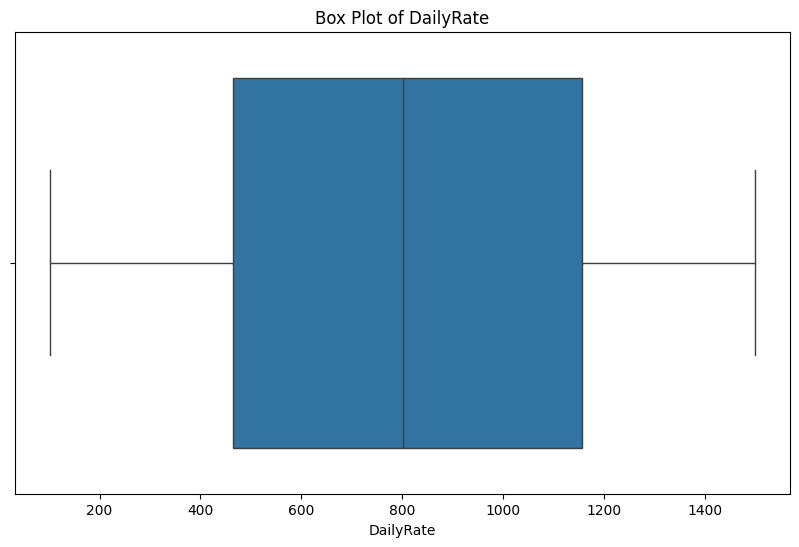

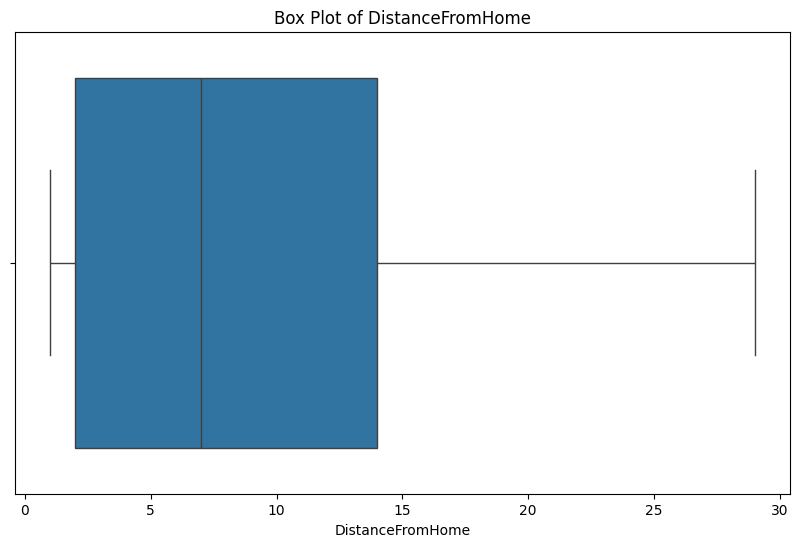

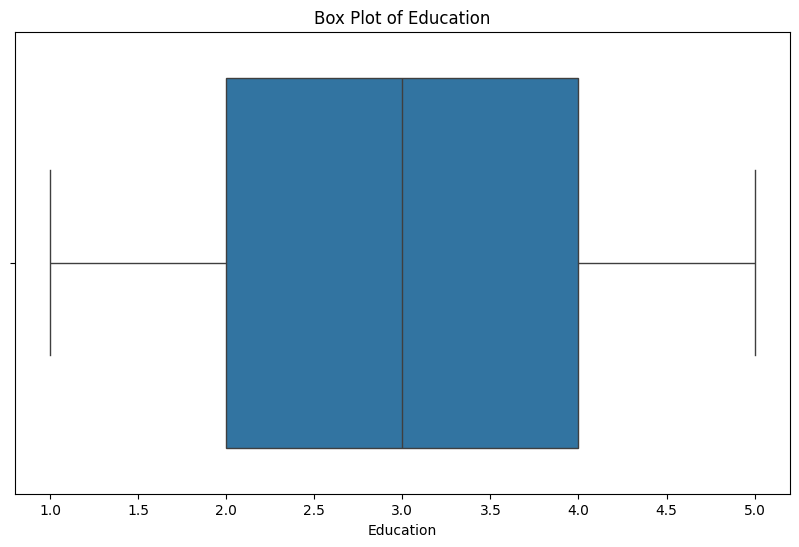

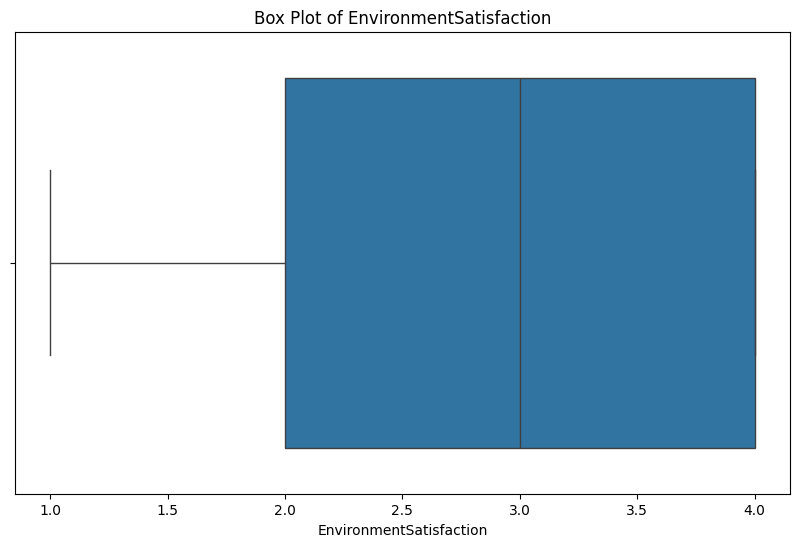

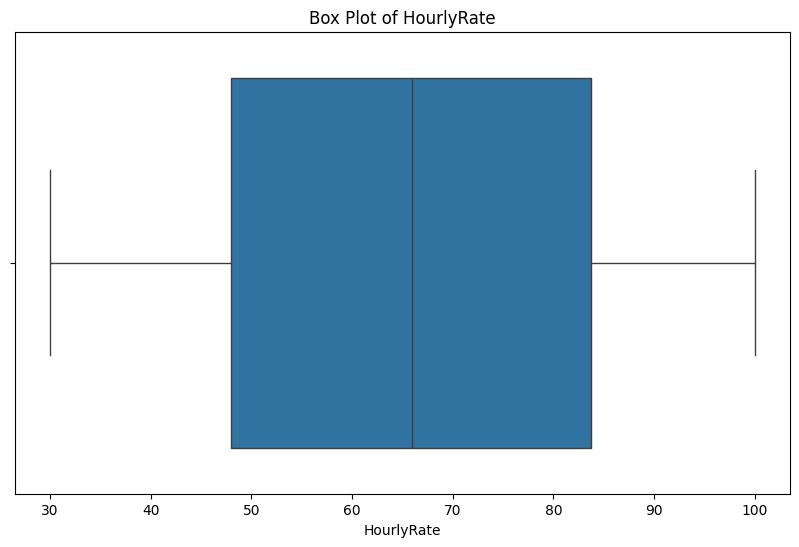

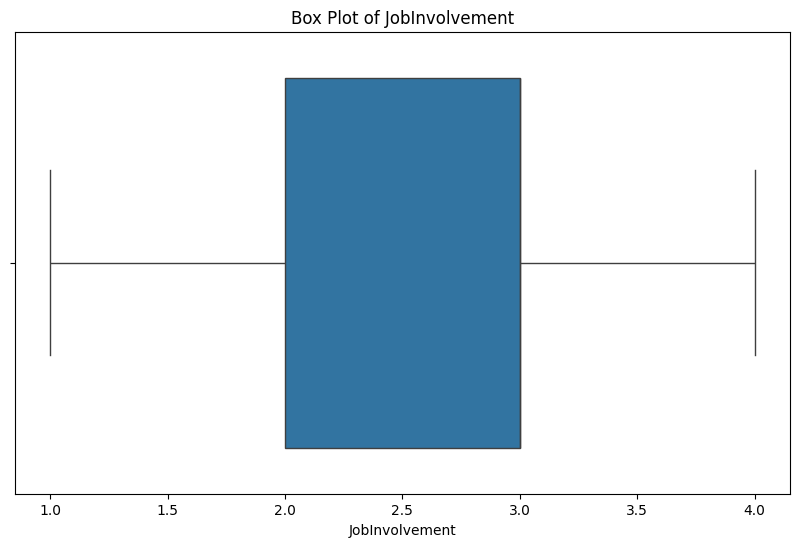

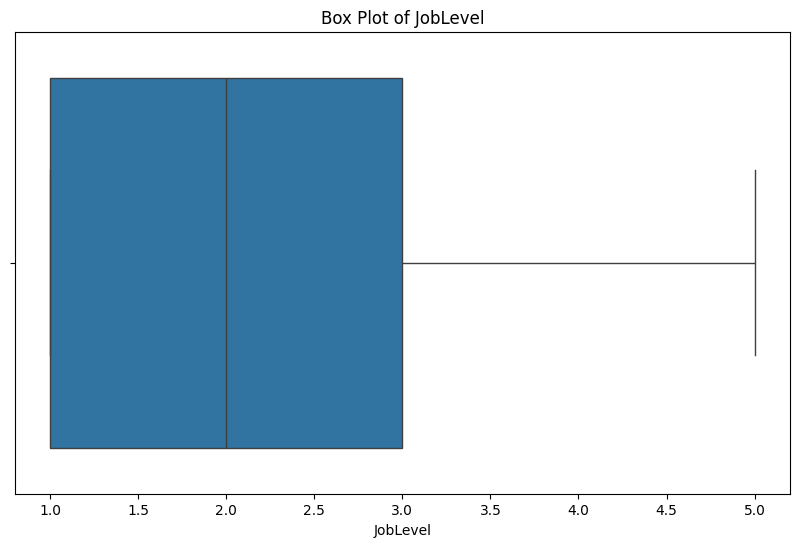

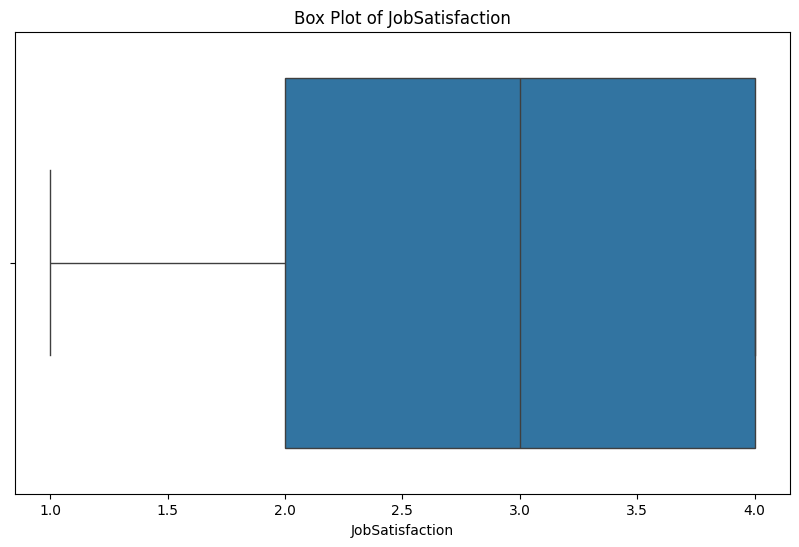

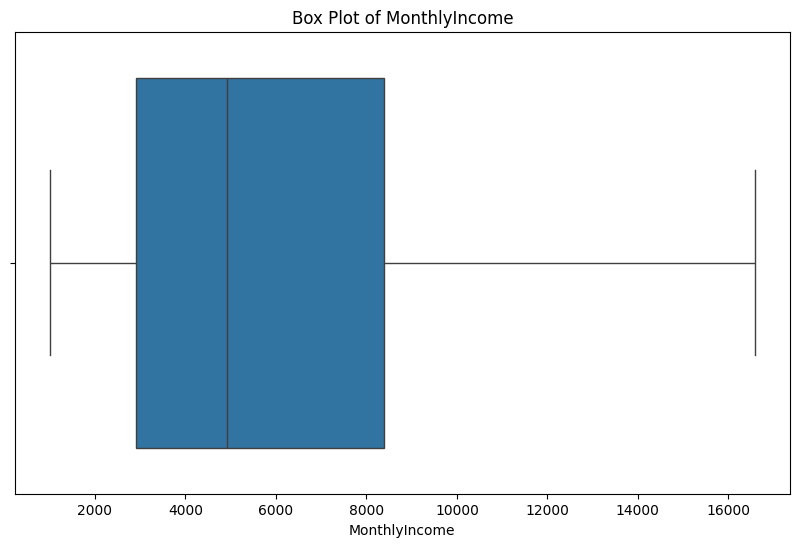

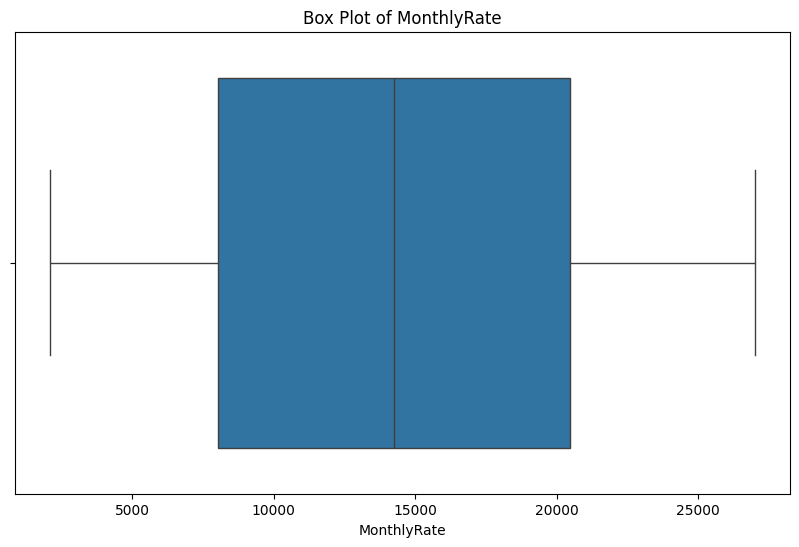

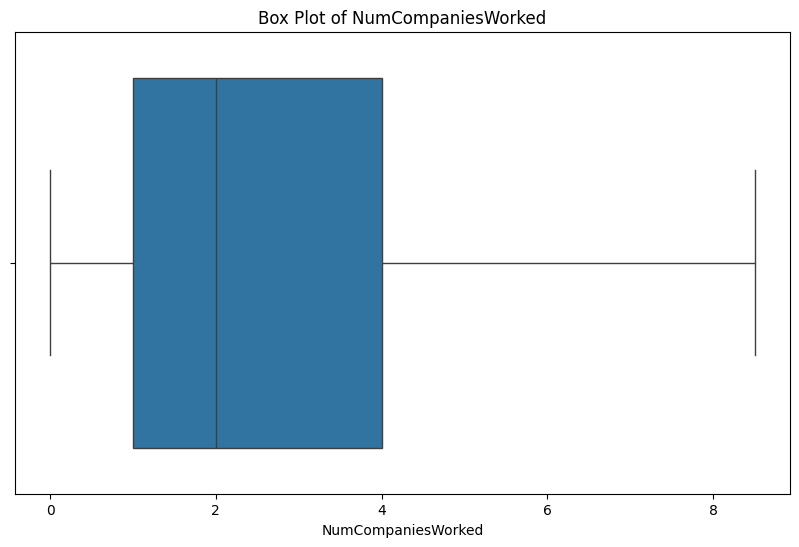

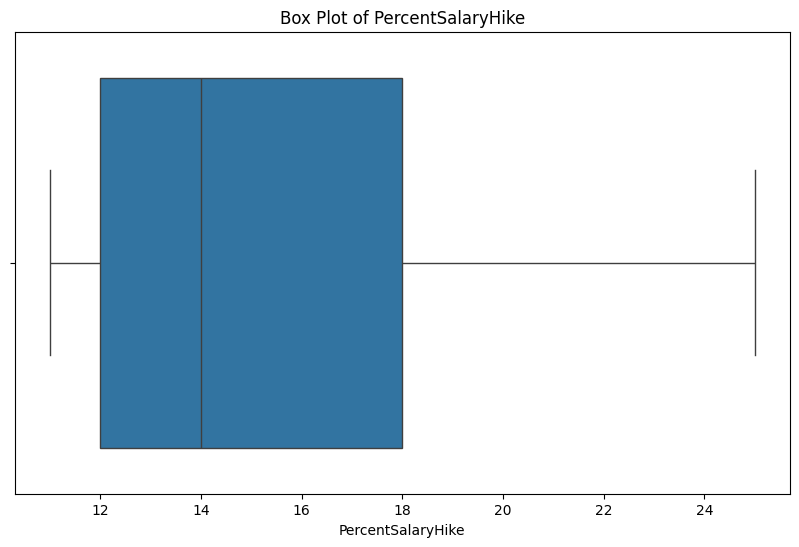

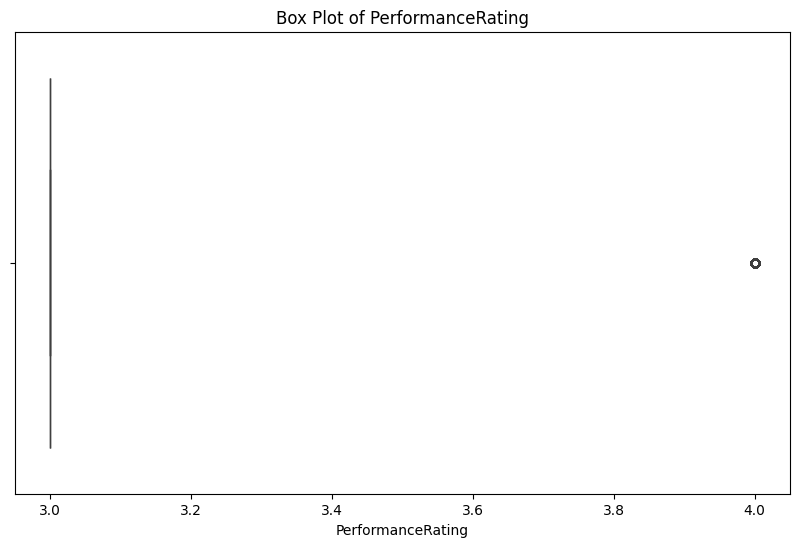

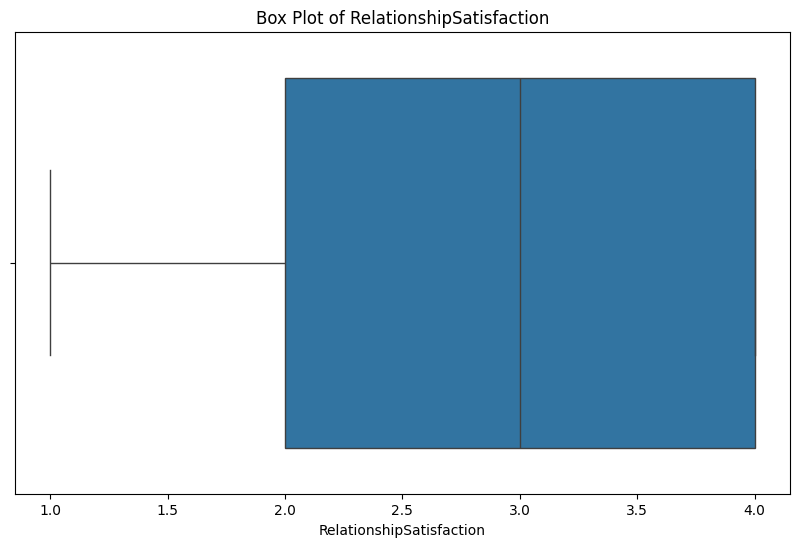

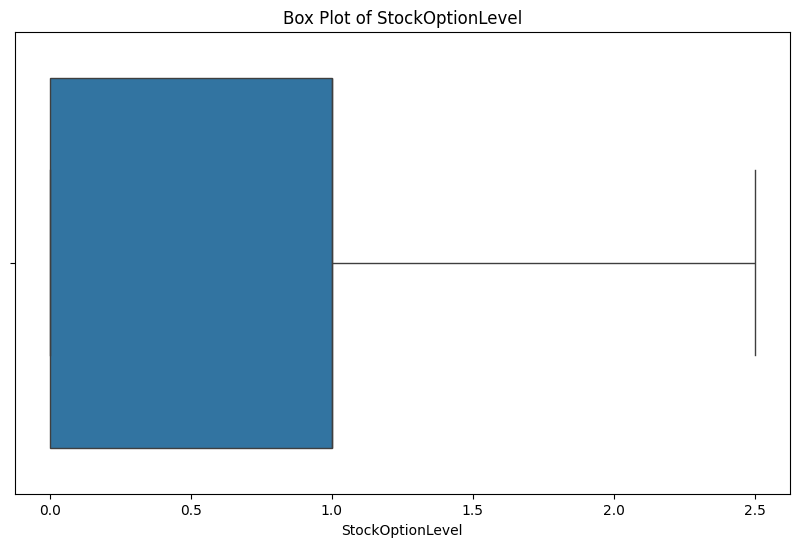

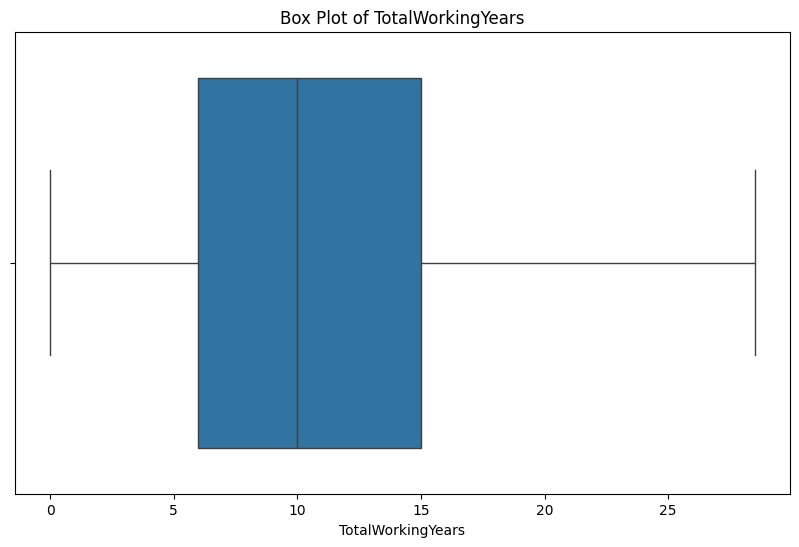

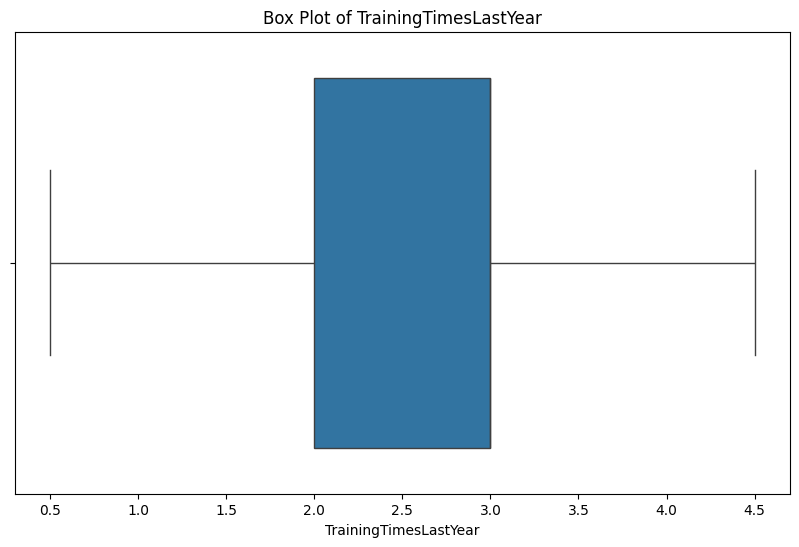

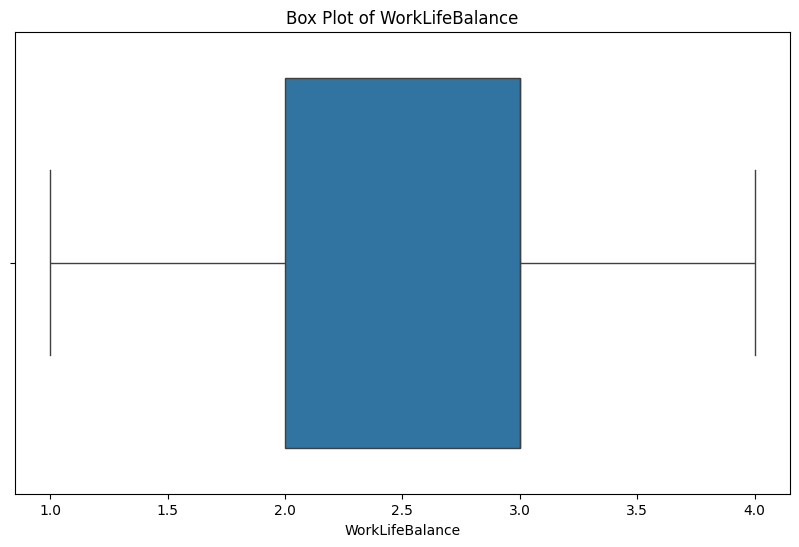

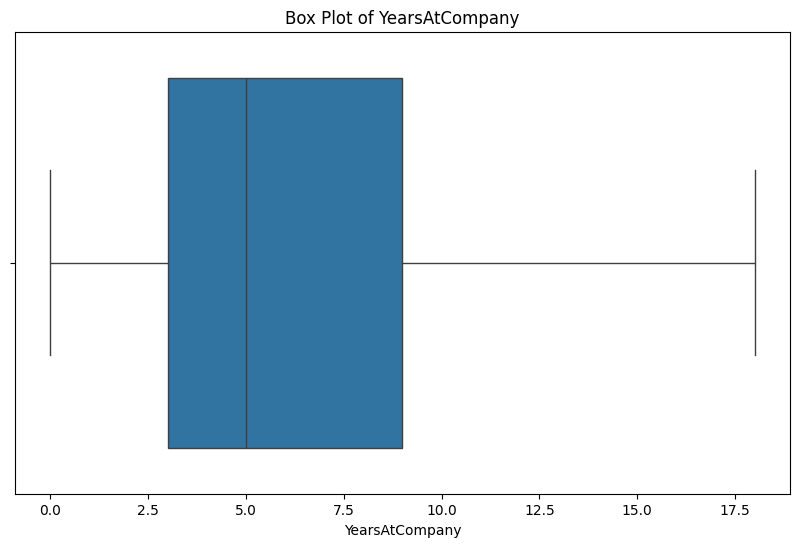

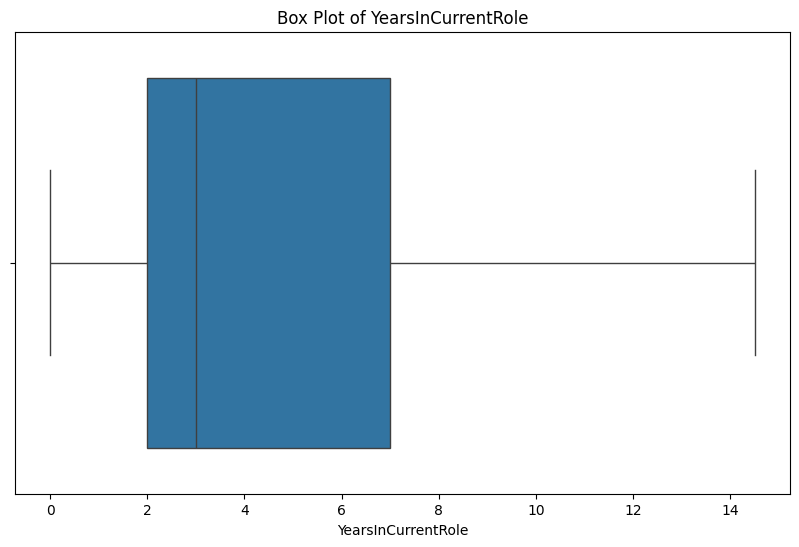

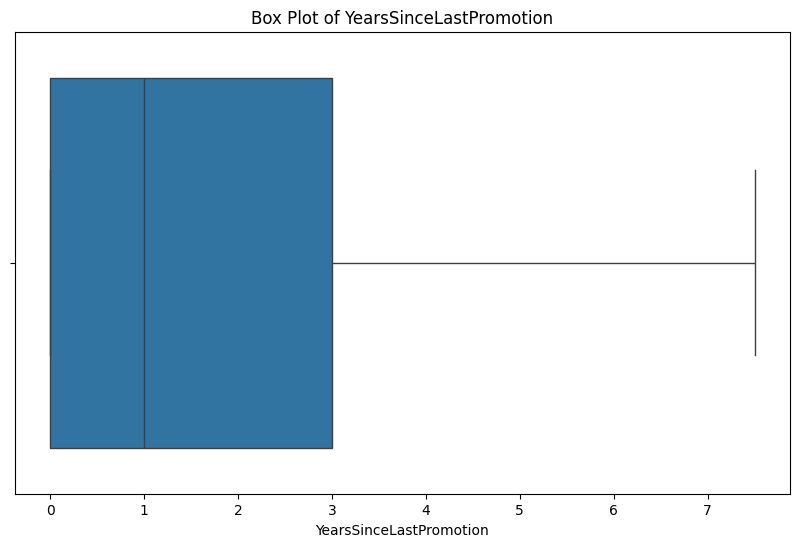

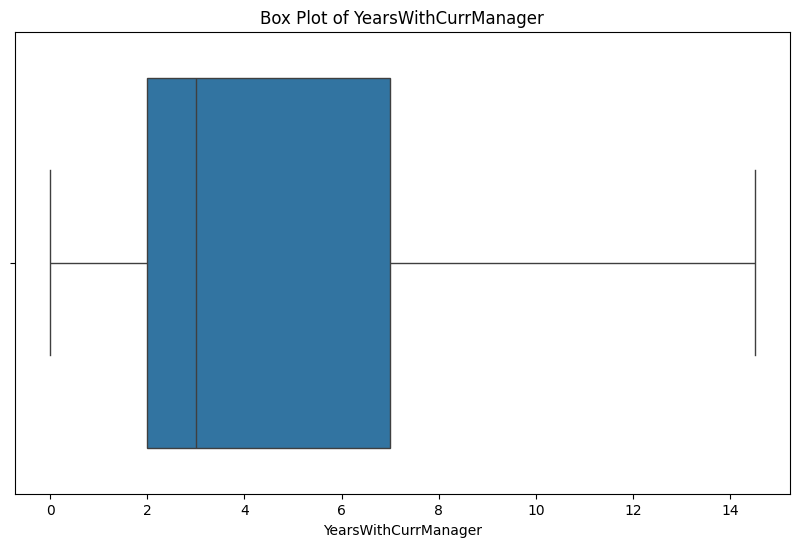

In [46]:
# Kolom fitur numerik yang dibersihkan dari outlier
cols_to_clean = ['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears',
                 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                 'YearsWithCurrManager']

# Menghitung Q1, Q3, dan IQR
Q1 = employee_df[cols_to_clean].quantile(0.25)
Q3 = employee_df[cols_to_clean].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menggunakan metode clipping untuk menangani outlier
employee_df[cols_to_clean] = employee_df[cols_to_clean].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Tinjau ulang box plot setelah penanganan outlier
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=employee_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

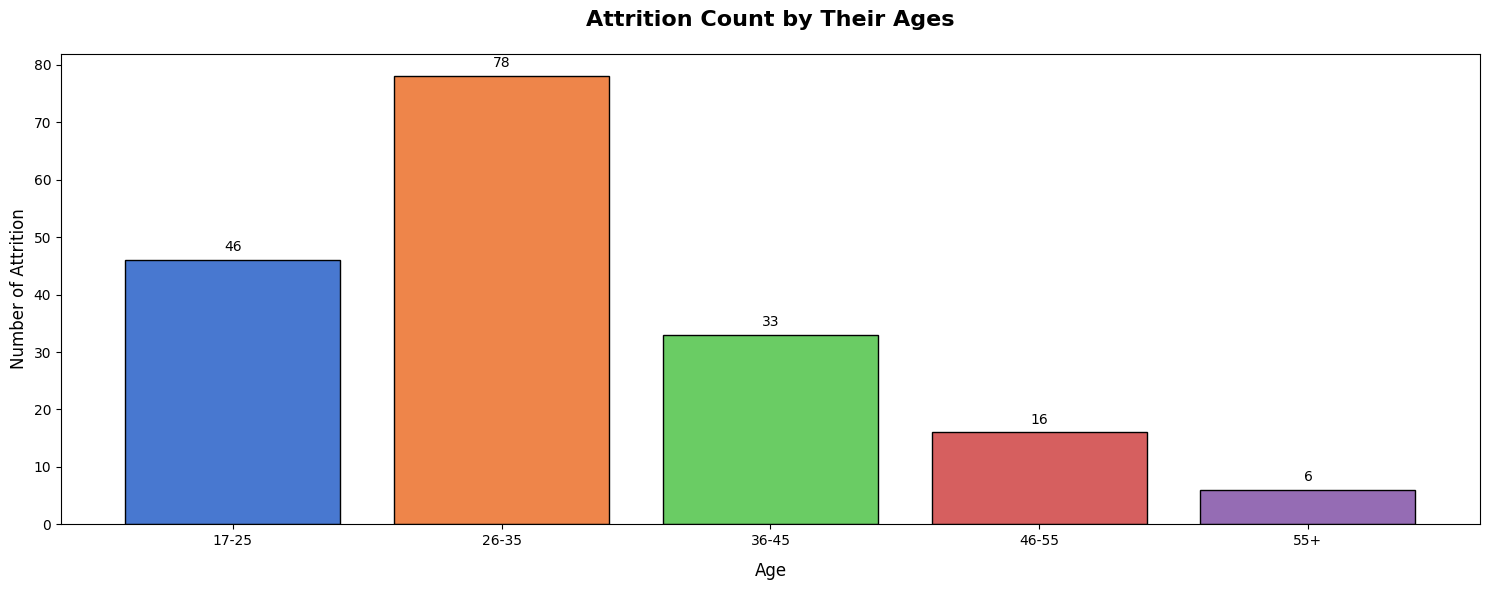

In [47]:
# Mengelompokkan usia ke dalam kategori age group
bins = [17, 26, 36, 46, 55, 60] 
labels = ['17-25', '26-35', '36-45', '46-55', '55+']
employee_df['AgeGroup'] = pd.cut(employee_df['Age'], bins=bins, labels=labels, right=True)

# Menghitung attrition rate di setiap kelompok usia
attr_rate_age = employee_df[employee_df['Attrition'] == 1].groupby('AgeGroup', observed=True).size()

# Menyusun data untuk plotting
x = attr_rate_age.index
y = attr_rate_age.values

# Membuat bar chart untuk distribusi attrition berdasarkan kelompok usia
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=sns.color_palette('muted'), edgecolor='black')
plt.title('Attrition Count by Their Ages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age', fontsize=12, labelpad=10)
plt.ylabel('Number of Attrition', fontsize=12)


# Menambahkan label di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i] + 1, y[i], ha='center', va='bottom', fontsize=10)
  
plt.tight_layout()
plt.show()


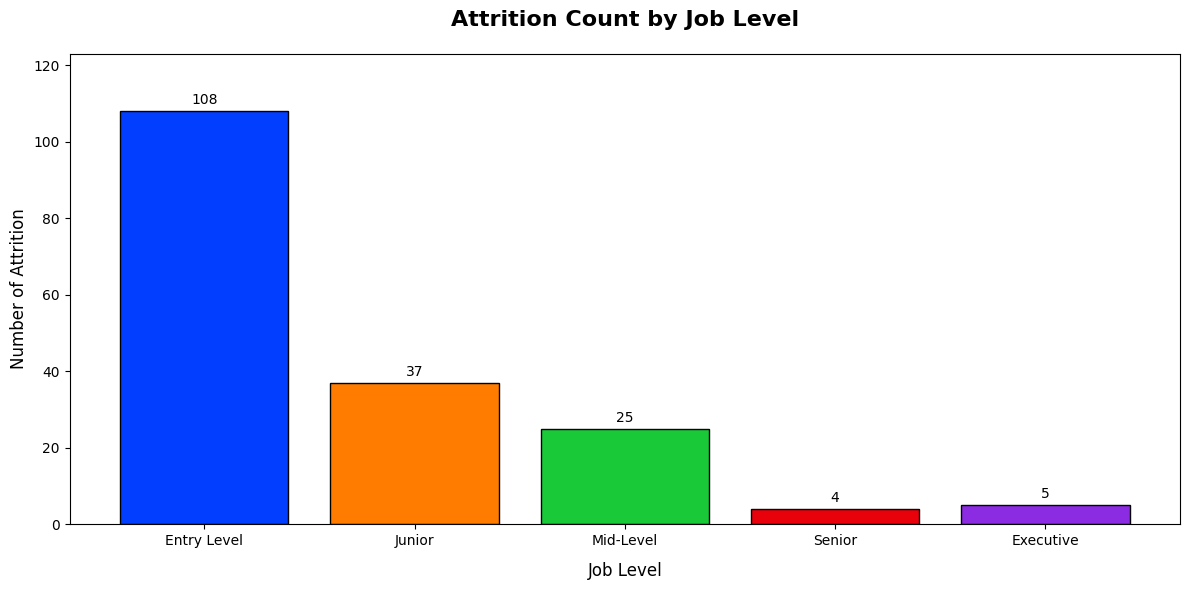

In [48]:
# Mengelompokkan job level ke dalam kategori Job Level Group

bins_job_level = [1, 2, 3, 4, 5, 6] 
job_level_labels = ['Entry Level', 'Junior', 'Mid-Level', 'Senior', 'Executive']
employee_df['JobLevelGroup'] = pd.cut(employee_df['JobLevel'], bins=bins_job_level, labels=job_level_labels, right=False)

# Menghitung attrition count di setiap kelompok job level
attr_rate_job_level = employee_df[employee_df['Attrition'] == 1].groupby('JobLevelGroup', observed=True).size()

# Menyusun data untuk plotting
x = attr_rate_job_level.index
y = attr_rate_job_level.values

# Membuat bar chart untuk distribusi attrition berdasarkan kelompok job level
plt.figure(figsize=(12, 6))  
plt.bar(x, y, color=sns.color_palette('bright'), edgecolor='black')
plt.title('Attrition Count by Job Level', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Job Level', fontsize=12, labelpad=10)
plt.ylabel('Number of Attrition', fontsize=12)
plt.ylim(0, max(y) + 15)

# Menambahkan label di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i] + 1, y[i], ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

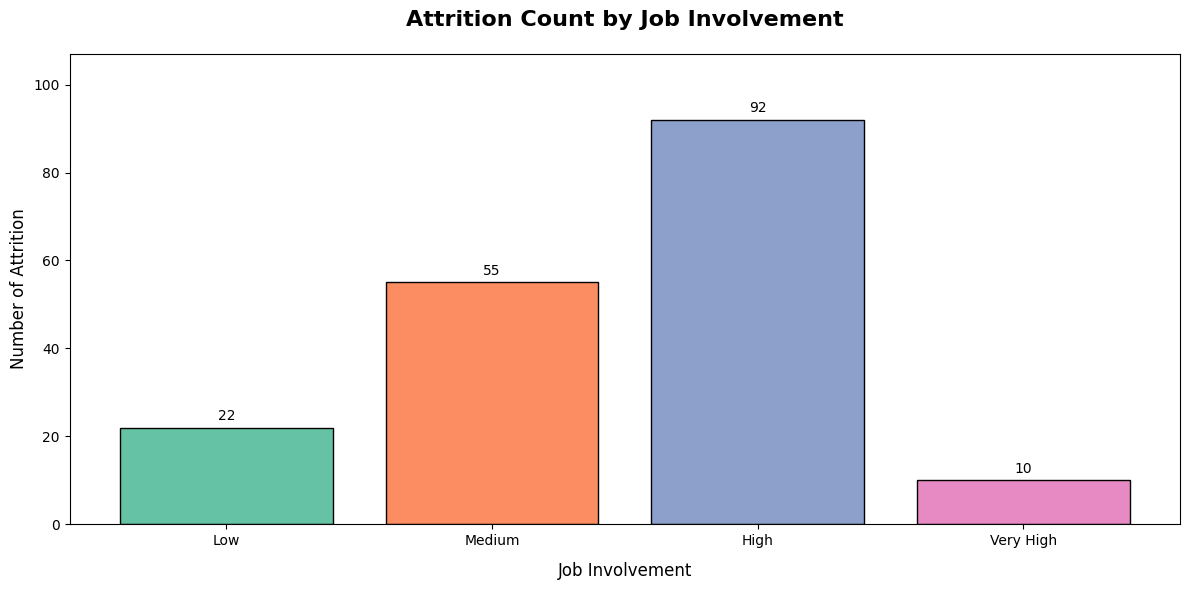

In [49]:
# Mengelompokkan Job Involvement ke dalam kategori Job Involvement Category

bins_involment = [1, 2, 3, 4, 5]
labels_involment = ['Low', 'Medium', 'High', 'Very High']
employee_df['JobInvolvementCategory'] = pd.cut(employee_df['JobInvolvement'], bins=bins_involment, labels=labels_involment, right=False)

# Menghitung attrition count di setiap kelompok job involvement
attr_rate_job_involment = employee_df[employee_df['Attrition'] == 1].groupby('JobInvolvementCategory', observed=True).size()

# Menyusun data untuk plotting
x = attr_rate_job_involment.index
y = attr_rate_job_involment.values

# Membuat bar chart untuk distribusi attrition berdasarkan kelompok job involvement
plt.figure(figsize=(12, 6))
plt.bar(x, y, color=sns.color_palette('Set2'), edgecolor='black')
plt.title('Attrition Count by Job Involvement', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Job Involvement', fontsize=12, labelpad=10)
plt.ylabel('Number of Attrition', fontsize=12)
plt.ylim(0, max(y) + 15)

# Menambahkan label di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i] + 1, y[i], ha='center', va='bottom', fontsize=10)  
plt.tight_layout()
plt.show()

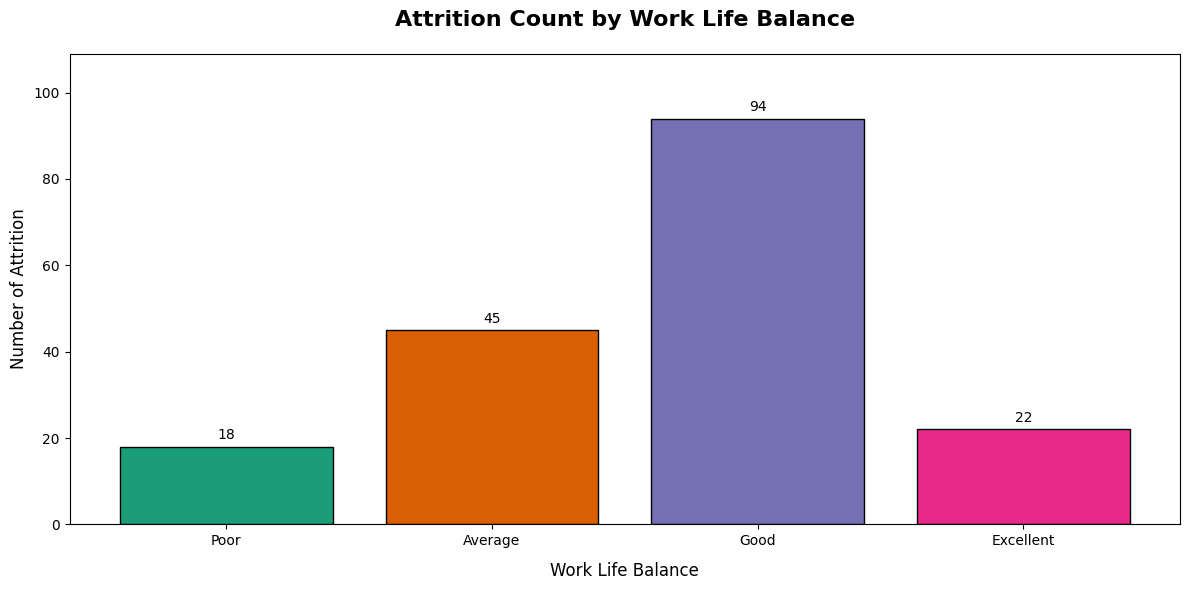

In [50]:
# Mengelompokkan Work Life Balance ke dalam kategori Work Life Balance Group

bins_wlb = [1, 2, 3, 4, 5]
labels_wlb = ['Poor', 'Average', 'Good', 'Excellent']
employee_df['WorkLifeBalanceGroup'] = pd.cut(employee_df['WorkLifeBalance'], bins=bins_wlb, labels=labels_wlb, right=False)

# Menghitung attrition count di setiap kelompok work life balance
attr_rate_wlb = employee_df[employee_df['Attrition'] == 1].groupby('WorkLifeBalanceGroup', observed=True).size()

# Menyusun data untuk plotting
x = attr_rate_wlb.index
y = attr_rate_wlb.values

# Membuat bar chart untuk distribusi attrition berdasarkan kelompok work life balance
plt.figure(figsize=(12, 6))
plt.bar(x, y, color=sns.color_palette('Dark2'), edgecolor='black')
plt.title('Attrition Count by Work Life Balance', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Work Life Balance', fontsize=12, labelpad=10)
plt.ylabel('Number of Attrition', fontsize=12)
plt.ylim(0, max(y) + 15)

# Menambahkan label di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i] + 1, y[i], ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

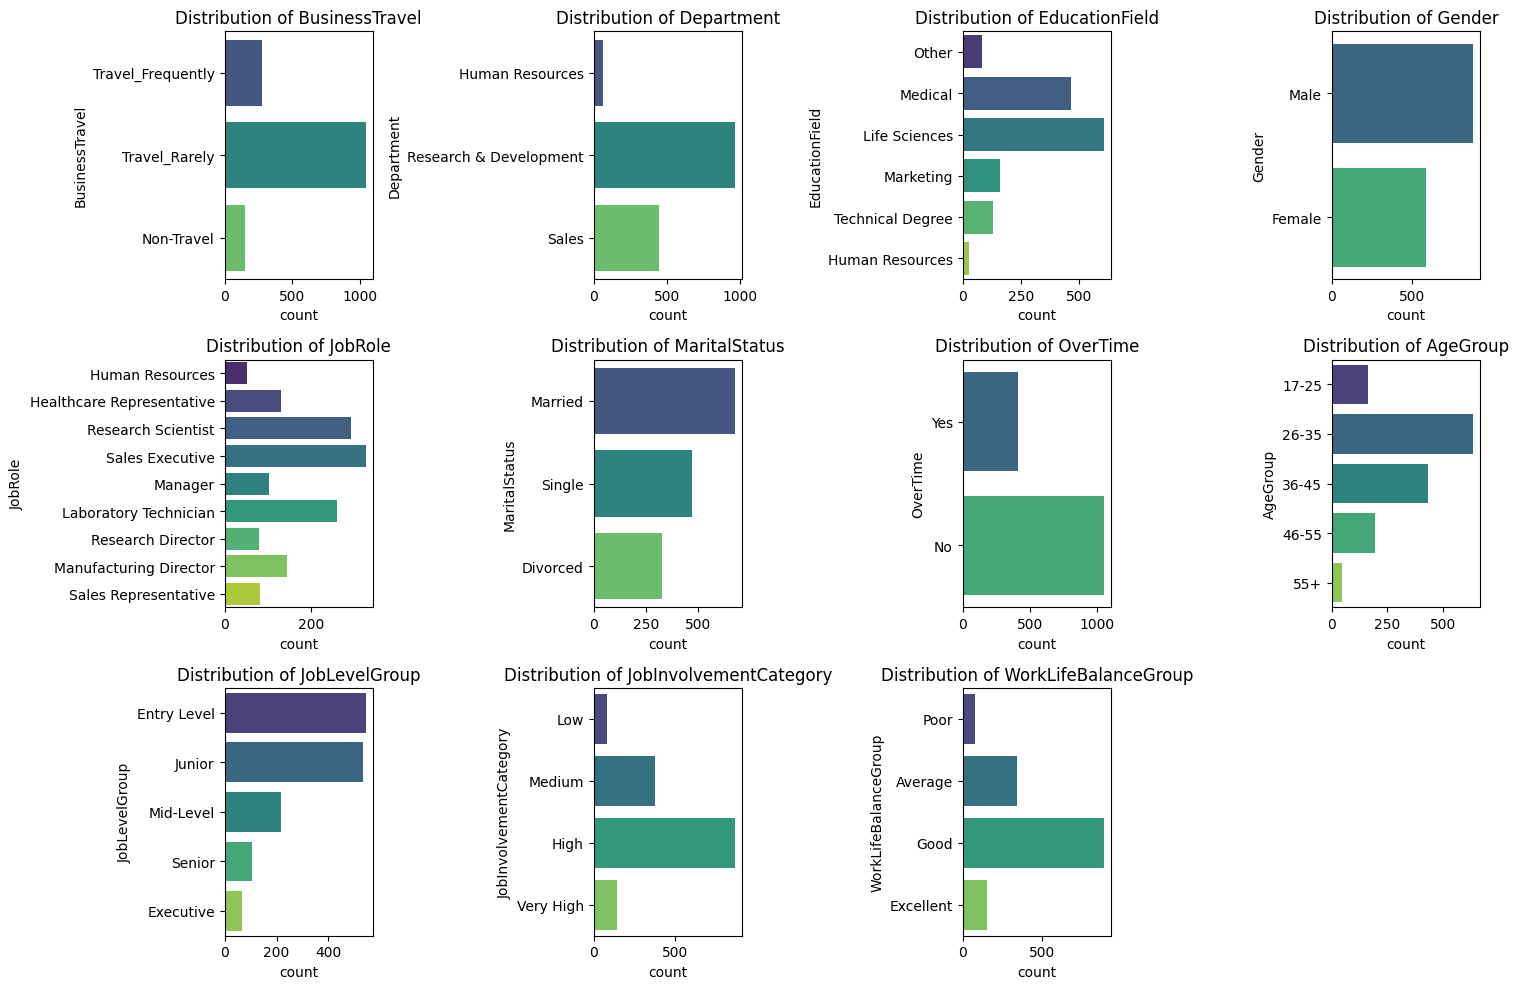

In [51]:
# Tinjau ulang fitur kategorikal
categorical_features = employee_df.select_dtypes(include=['object', 'category']).columns

n_feature_cat = len(categorical_features)
n_cols_cat = 4
n_row_cat = (n_feature_cat + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_row_cat, n_cols_cat, i)
    sns.countplot(y=employee_df[feature], 
                  hue=employee_df[feature], 
                  palette='viridis', 
                  legend=False)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [52]:
df_used = employee_df.copy()

df_used.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.121769,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.764966,11.103061,2.710884,2.761224,6.617687,4.207823,1.922789,4.107483
std,424.496761,9.135373,0.327130,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.782312,7.303828,1.037954,0.706476,4.989788,3.555335,2.478222,3.517487
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,2.500000,28.500000,4.500000,4.000000,18.000000,14.500000,7.500000,14.500000


In [53]:
# Drop EmployeeId karena tidak akan digunakan pada prediksi attrition
df_used.drop('EmployeeId', axis=1, inplace=True)

In [54]:
# Use one-hot encoding untuk fitur kategorikal

categorical_features = df_used.select_dtypes(include=['object', 'category']).columns

# Gunakan 'pd.get_dummies' untuk melakukan OneHotEncoding
df_encoded = pd.get_dummies(
    df_used,
    columns = categorical_features,
    drop_first = True,
    dtype=int
)

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_encoded.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobLevelGroup_Junior,JobLevelGroup_Mid-Level,JobLevelGroup_Senior,JobLevelGroup_Executive,JobInvolvementCategory_Medium,JobInvolvementCategory_High,JobInvolvementCategory_Very High,WorkLifeBalanceGroup_Average,WorkLifeBalanceGroup_Good,WorkLifeBalanceGroup_Excellent
0,38,0.0,1444,1,4,4,88,3,1,2,...,0,0,0,0,0,1,0,0,1,0
1,37,1.0,1141,11,2,1,61,1,2,2,...,1,0,0,0,0,0,0,0,0,0
2,51,1.0,1323,4,4,1,34,3,1,3,...,0,0,0,0,0,1,0,0,0,1
3,42,0.0,555,26,3,3,77,3,4,2,...,0,0,1,0,0,1,0,0,0,1
4,40,0.0,1194,2,4,3,98,3,1,3,...,0,0,0,0,0,1,0,0,1,0


In [55]:
# Pisahkan attirion dan fitur

X = df_encoded.drop(['Attrition'], axis=1)
y = df_encoded['Attrition']

# Melihat distribusi kelas
print("Distribusi kelas sebelum SMOTE:", Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0.0: 1291, 1.0: 179})


In [56]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

# Panggil fungsi untuk membagi data.
#  - Gunakan 'stratify=y' agar proporsi kelas di train/test set sama.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

# Tampilkan jumlah data pada masing-masing set
print("Jumlah data total: ",len(X))
print("Jumlah data latih: ",len(X_train))
print("Jumlah data test: ",len(X_test))

Jumlah data total:  1470
Jumlah data latih:  1176
Jumlah data test:  294


In [57]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
 
# Menentukan ambang batas untuk fitur penting
threshold = 0.03  # ambang batas 3%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]
 
# Mencetak fitur yang dipilih
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasarkan importance
important_features = X_train.columns[important_features_indices]
important_test_features = X_test.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = X_train[important_features]  # Hanya fitur penting dari data pelatihan
X_test_important = X_test[important_test_features]  # Hanya fitur penting dari data pengujian

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)
print("Dimensi data pengujian dengan fitur penting:", X_test_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Age: 0.054085090260573974
DailyRate: 0.054295889116607925
DistanceFromHome: 0.04093464781430056
HourlyRate: 0.04249487041475666
MonthlyIncome: 0.06500144387047224
MonthlyRate: 0.04396380573914523
PercentSalaryHike: 0.0300437639646563
StockOptionLevel: 0.040154892095735244
TotalWorkingYears: 0.04420259803522354
YearsAtCompany: 0.03315920707033205
OverTime_Yes: 0.05477368947605332

Dimensi data pelatihan dengan fitur penting: (1176, 11)
Dimensi data pengujian dengan fitur penting: (294, 11)


In [58]:
X_important.describe(include='all')

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,YearsAtCompany,OverTime_Yes
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.873299,797.335884,9.283163,65.692177,6288.305272,14252.306122,15.230442,0.769983,11.018707,6.565476,0.282313
std,9.109271,404.296694,8.103202,20.429986,4286.589459,7132.839260,3.685804,0.780088,7.201837,4.941613,0.450316
min,18.000000,102.000000,1.000000,30.000000,1091.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2931.250000,7849.500000,12.000000,0.000000,6.000000,3.000000,0.000000
50%,36.000000,801.500000,7.000000,66.000000,4877.500000,14144.000000,14.000000,1.000000,10.000000,5.000000,0.000000
75%,43.000000,1153.250000,14.000000,83.000000,7980.500000,20372.500000,18.000000,1.000000,15.000000,9.000000,1.000000
max,60.000000,1498.000000,29.000000,100.000000,16581.000000,26959.000000,25.000000,2.500000,28.500000,18.000000,1.000000


In [59]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Fit dan Resample pada data yang sudah diseleksi fiturnya
X_resampled, y_resampled = smote.fit_resample(X_important, y_train)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Mengubah hasil menjadi DataFrame untuk analisis lebih lanjut
X_resampled = pd.DataFrame(X_resampled, columns=X_important.columns)
y_resampled = pd.Series(y_resampled, name='Attrition')

Distribusi kelas setelah SMOTE: Counter({0.0: 1033, 1.0: 1033})


In [60]:
# Inisialisasi Scaler
scaler = StandardScaler()

# Fit dan Transform pada data hasil SMOTE
X_train_final = scaler.fit_transform(X_resampled)

# Transform pada data Test 
X_test_final = scaler.transform(X_test_important)

# Mengubah hasil menjadi DataFrame untuk analisis lebih lanjut
X_train_final = pd.DataFrame(X_train_final, columns=X_important.columns)
X_test_final = pd.DataFrame(X_test_final, columns=X_test_important.columns)


## Modeling

In [61]:
# Inisialisasi Model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Latih (fit) model dengan data training (X_resampled dan y_resampled)
model.fit(X_train_final, y_resampled)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [62]:
# Menentukan Hyperparameter yang akan di-tuning

params = {'n_estimators': [100, 200, 300],
          'max_depth': [10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'class_weight': ['balanced', 'balanced_subsample']}

# Membuat (instantiate) objek dari algoritma tuning
model_tuned = RandomizedSearchCV(
    estimator = RandomForestClassifier(random_state=42),
    param_distributions = params,
    cv = 5,
    scoring = 'accuracy'
)

# Latih objek model dengan data training (X_train_final dan y_resampled)
model_tuned.fit(X_train_final, y_resampled)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'class_weight': ['balanced', 'balanced_subsample'], 'max_depth': [10, 20, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies tha

## Evaluation

In [63]:
# Evaluasi model sebelum tuning

# Membuat prediksi pada 'X_test' menggunakan model yang belum di-tuning
y_pred = model.predict(X_test_final)

# Menampilkan hasil evaluasi
print("\n--- Akurasi Model ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

print("\n--- Laporan Klasifikasi ---")
print(classification_report(y_test, y_pred))


--- Akurasi Model ---
Accuracy Score: 0.83

--- Laporan Klasifikasi ---
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       258
         1.0       0.22      0.14      0.17        36

    accuracy                           0.83       294
   macro avg       0.55      0.53      0.54       294
weighted avg       0.80      0.83      0.82       294



In [64]:
# Evaluasi model setelah tuning

# Membuat prediksi pada 'X_test' menggunakan model yang sudah di-tuning
y_pred_tuning = model_tuned.predict(X_test_final)

# Menampilkan classification_report untuk model yang sudah di-tuning
print("Tuned Model Performance")
print(classification_report(y_test, y_pred_tuning))


Tuned Model Performance
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       258
         1.0       0.23      0.17      0.19        36

    accuracy                           0.83       294
   macro avg       0.56      0.54      0.55       294
weighted avg       0.81      0.83      0.82       294



In [65]:
# Menyimpan Model hasil tuning

#joblib.dump(model_tuned, 'rf_model_tuned.pkl')